# Graded Challenge 4

`Ridhwan Muttaqien - HCK06`

## Description & Objective

```
Dataset berisi informasi penggunaan kartu kredit selama 6 bulan terakhir dari sebuah bank. Tidak ada kolom berisi data demografi pemegang kartu kredit pada dataset, hanya ada informasi transaksi kartu kredit.

Graded Challenge 4 ini dikerjakan untuk membuat segmentasi customer berdasarkan perilaku transaksinya di 6 bulan terakhir. Hasil segmentasi bisa digunakan oleh bank pemilik kartu kredit sebagai acuan memberikan penawaran-penawaran menarik pada customer sesuai segmennya. Ini diharapkan dapat menjaga loyalitas customer. Hasil segmentasi juga bisa digunakan untuk memetakan siapa saja yang menjadi customer sehingga bank bisa menentukan strategi pemasaran untuk mencari customer baru.
```

## Query SQL

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_006_hck.credit-card-information`
WHERE mod(CUST_ID ,2) = 0
```

## Libraries Importing

In [1]:
# memanggil library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score,silhouette_samples

import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

In [2]:
# membuka dataset

df = pd.read_csv('h8dsft_P1G4_Ridhwan_Muttaqien.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [3]:
# menampilkan 10 baris pertama dari dataset

df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [4]:
# menampilkan 10 baris terakhir dari dataset

df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [5]:
# melihat dataset secara statistik

df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4476.000000   1565.743939           0.877608   1003.158324   
std    2583.931114   2091.205727           0.235604   2210.812899   
min       2.000000      0.000000           0.000000      0.000000   
25%    2239.000000    132.536353           0.888889     40.065000   
50%    4476.000000    874.905296           1.000000    362.480000   
75%    6713.000000   2058.519163           1.000000   1122.640000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         588.504849              415.025075    973.453671   
std         1666.500287              927.360842   2133.464502   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           29.990000               89.450000      0.000000   
75%          580.320000              484.255000   1098.569962   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490122                    0.202614   
std               0.399874                    0.298502   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.364989                0.134156   
std                            0.397336                0.199221   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.181818   
max                            1.000000                1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4474.000000   4475.000000   
mean           3.196425      14.490503   4494.020175   1726.212274   
std            6.500169      24.156038   3668.535689   2961.258570   
min            0.000000       0.000000    150.000000      0.000000   
25%            0.000000       1.000000   1500.000000    390.206371   
50%            0.000000       7.000000   3000.000000    831.048408   
75%            4.000000      17.000000   6000.000000   1895.959003   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4317.000000       4475.000000  4475.000000  
mean         854.429538          0.157206    11.516425  
std         2306.411178          0.295869     1.347819  
min            0.037744          0.000000     6.000000  
25%          169.814310          0.000000    12.000000  
50%          309.854995          0.000000    12.000000  
75%          830.395060          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

In [6]:
for i in df:
    print(i)
    print(df[i].nunique())
    print('-'*30)

CUST_ID
4475
------------------------------
BALANCE
4439
------------------------------
BALANCE_FREQUENCY
42
------------------------------
PURCHASES
3218
------------------------------
ONEOFF_PURCHASES
2073
------------------------------
INSTALLMENTS_PURCHASES
2357
------------------------------
CASH_ADVANCE
2155
------------------------------
PURCHASES_FREQUENCY
47
------------------------------
ONEOFF_PURCHASES_FREQUENCY
44
------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY
47
------------------------------
CASH_ADVANCE_FREQUENCY
46
------------------------------
CASH_ADVANCE_TRX
55
------------------------------
PURCHASES_TRX
147
------------------------------
CREDIT_LIMIT
153
------------------------------
PAYMENTS
4350
------------------------------
MINIMUM_PAYMENTS
4317
------------------------------
PRC_FULL_PAYMENT
47
------------------------------
TENURE
7
------------------------------


```
- Kolom CUST_ID memiliki jumlah unique value sama dengan jumlah baris dataset. Ini menunjukkan semua baris memiliki value CUST_ID yang berbeda-beda. Jika kita lihat keterangan dari sumber dataset, kolom ini berisi nomor identifikasi pemilik credit card. Maka di proses selanjutnya kolom ini akan di drop dari dataset permodelan

- Kolom TENURE hanya memiliki 7 value yang unik, ini indikasi awal bahwa kolom ini kategorik maka kita perlu mengecek apakah value pada kolom ini kontinyu atau tidak
```

In [7]:
df.TENURE.value_counts()

12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: TENURE, dtype: int64

`Ternyata value pada kolom TENURE adalah diskrit maka kolom ini termasuk kategorik, maka dia akan didrop dari dataset permodelan di proses selanjutnya`

In [8]:
# mengecek missing value pada dataset

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`Dataset memiliki missing value di kolom minimum payment dan credit limit. Jumlah missing value adalah 159/4475 = 0.0355 atau 3.55% dari dataset. Karena jumlahnya sedikit (<5%), maka missing value akan dihapus di proses selanjutnya`

In [9]:
# mengecek jumlah data terduplikasi

df.duplicated().sum()

0

`Tidak terdapat data terduplikasi`

In [10]:
# menghapus semua baris dengan missing value

df.dropna(axis=0, inplace=True)

In [11]:
# membuat dataset untuk permodelan dengan menghapus kolom yang tidak digunakan

df_model = df.copy()
df_model.drop(['CUST_ID','TENURE'], axis = 1,inplace=True)
df_model.reset_index(drop=True)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      943.584041           0.875000     103.00            103.00   
1      461.455720           1.000000     585.00            585.00   
2     1053.594730           1.000000    1450.00           1450.00   
3     2237.238086           1.000000     120.00            120.00   
4      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4311  1079.008102           1.000000       0.00              0.00   
4312   809.582978           0.909091       0.00              0.00   
4313  3386.490883           1.000000     560.98            427.22   
4314  4840.545574           1.000000    1595.93           1595.93   
4315  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4311                    0.00   1259.571764             0.000000   
4312                    0.00   3819.672466             0.000000   
4313                  133.76   2008.153534             1.000000   
4314                    0.00   4359.325750             0.454545   
4315                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                          0.000000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4311                    0.000000                          0.000000   
4312                    0.000000                          0.000000   
4313                    0.727273                          0.363636   
4314                    0.454545                          0.000000   
4315                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        1000.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        2500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4311                0.545455                 9              0        1200.0   
4312                0.545455                 7              0        4150.0   
4313                0.545455                 9             20       10100.0   
4314                0.545455                17             25        6000.0   
4315                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      215.325023        410.484825          0.000000  
1      258.032630        151.696433          0.000000  
2      397.090516        227.143184          0.000000  
3      343.102984        712.986387          0.000000  
4       57.266292         56.720210          0.000000  
...           ...               ...               ...  
4311  1379.635287        271.364415          0.090909  
4312  4372.148648        241.645387          0.090909  
4313  1039.000037        886.050237          0.000000  
4314   905.844846       23

## Exploratory Data Analysis (EDA) for Insight

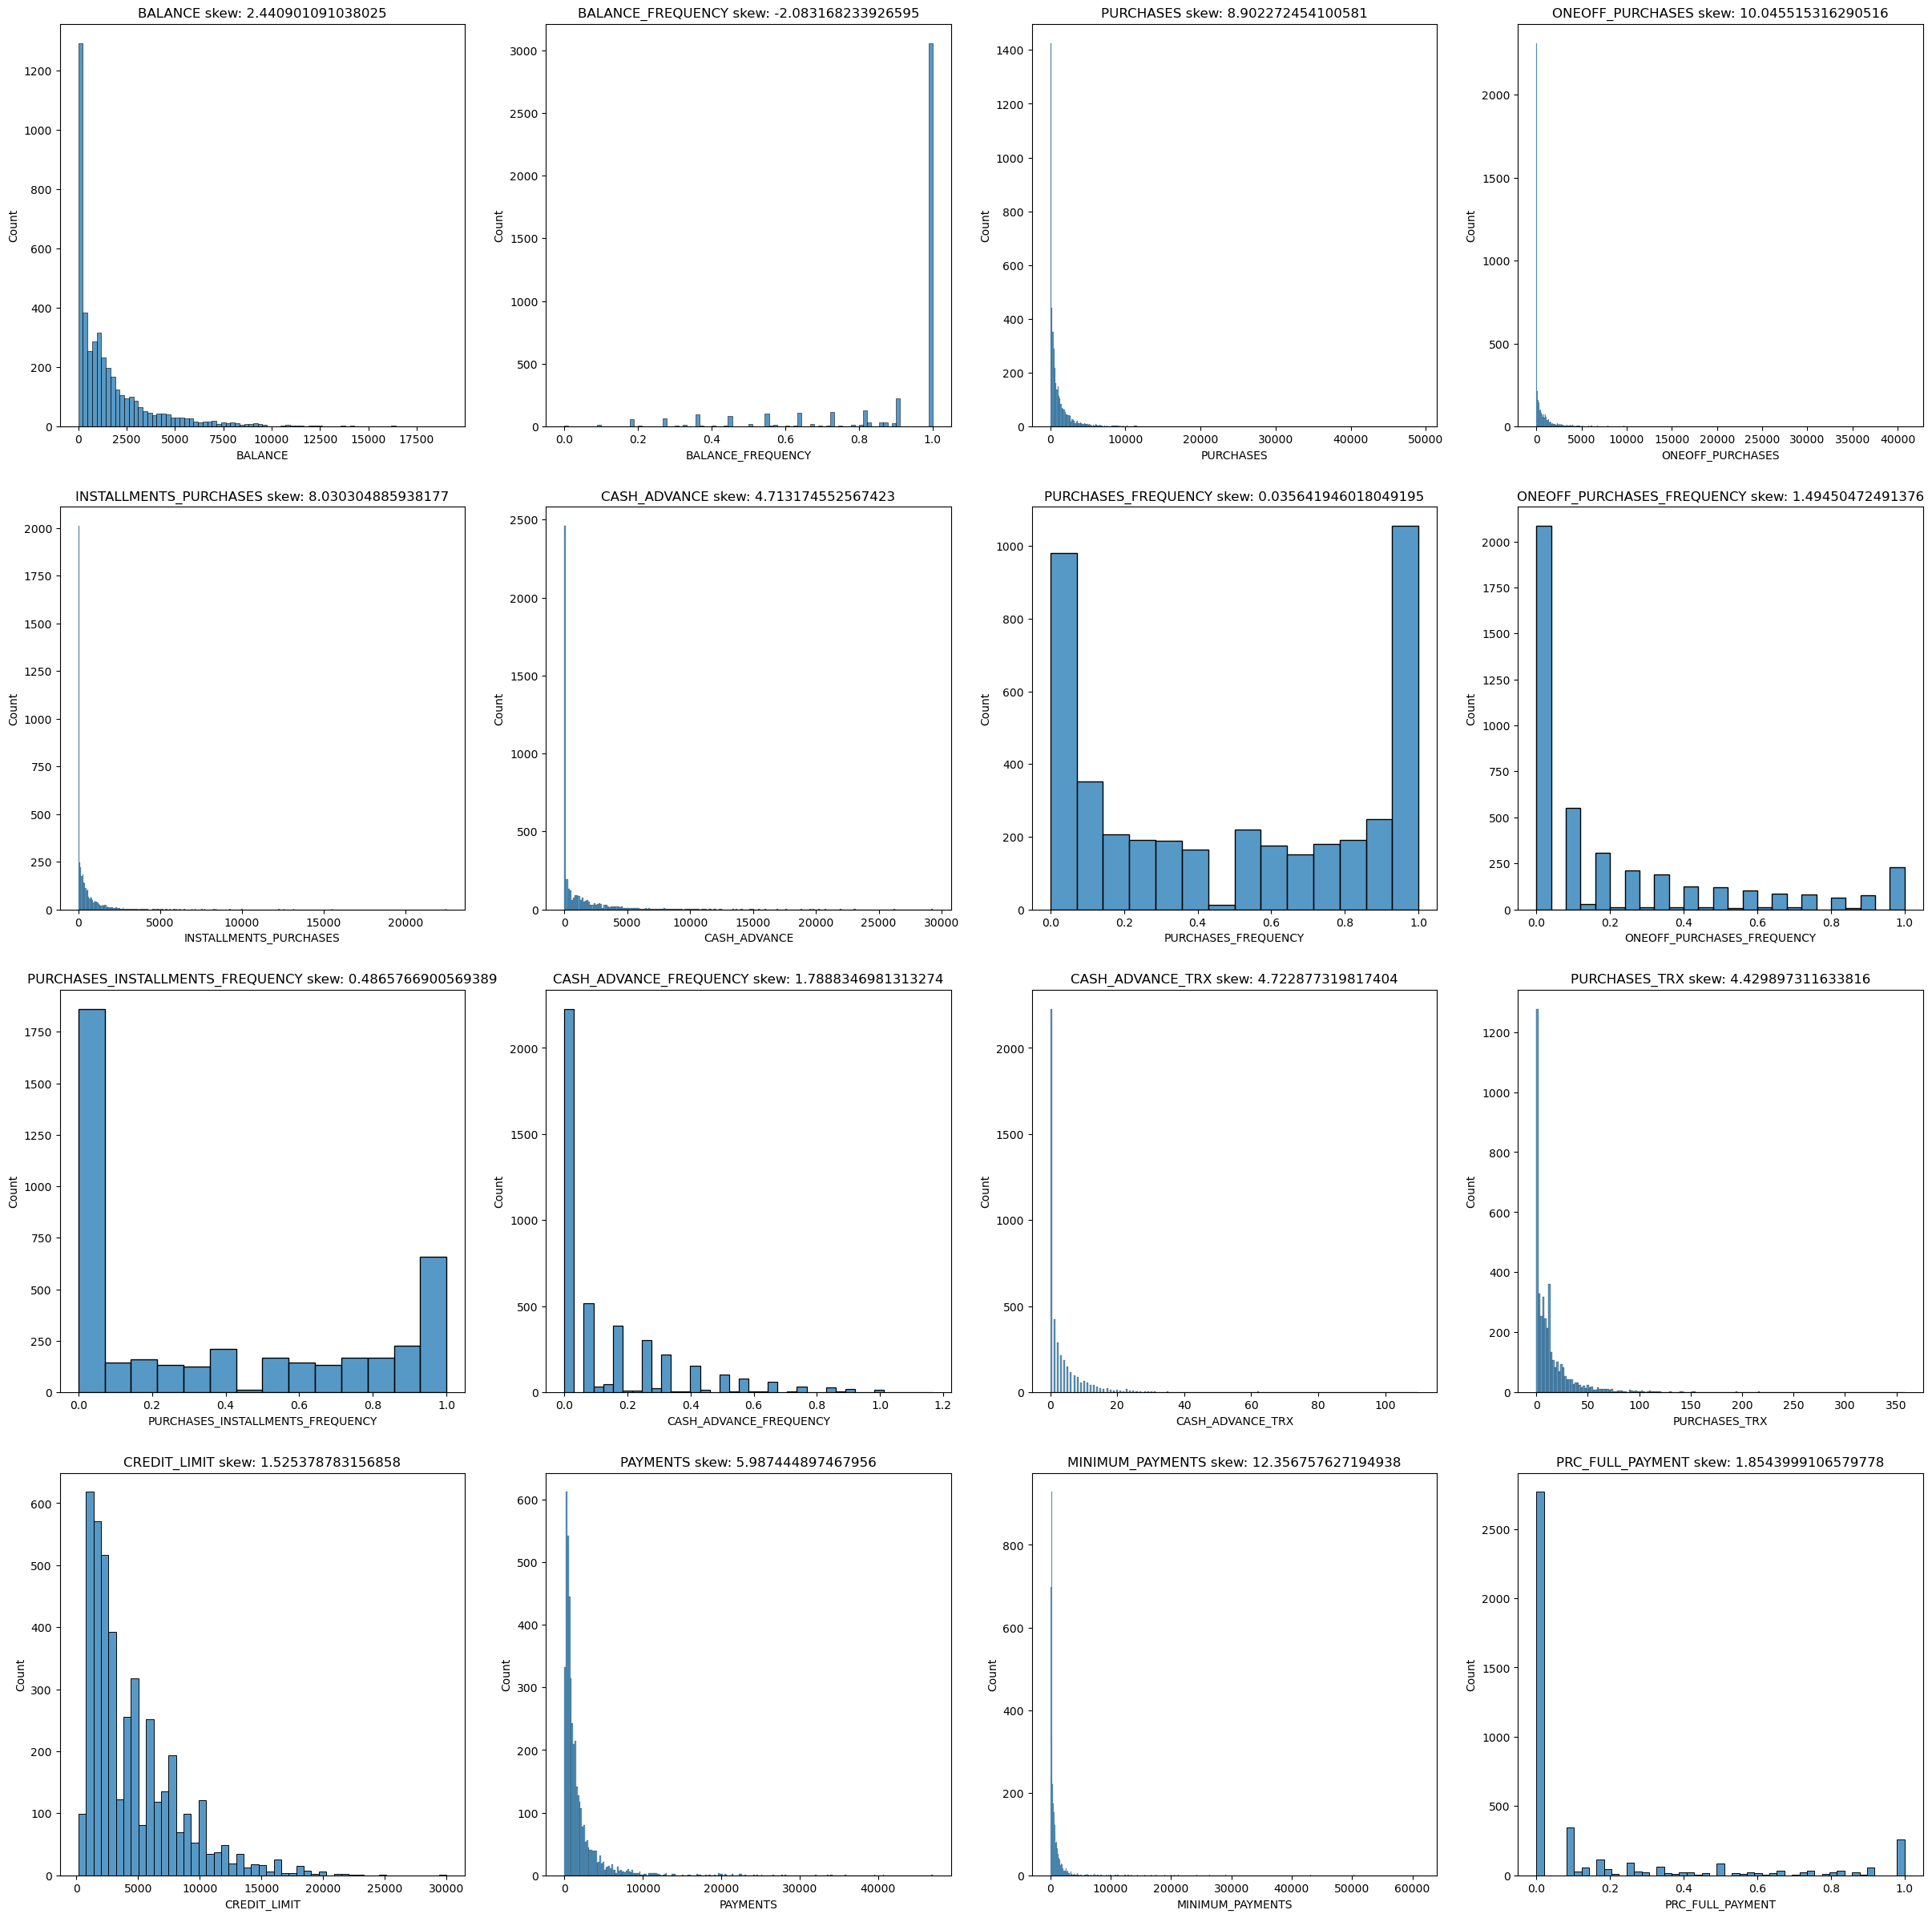

In [13]:
# menampilkan distribusi data semua kolom pada dataset model 

num_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=[30,30])
ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(df_model[col], ax=ax[idx])
    ax[idx].set_title(f'{num_cols[idx]} skew: {df_model[col].skew()}')

In [14]:
df_model.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4316.000000        4316.000000   4316.000000       4316.000000   
mean    1600.114511           0.895236   1025.274057        600.770438   
std     2107.347942           0.206730   2241.729131       1690.105736   
min        0.000000           0.000000      0.000000          0.000000   
25%      152.877191           0.909091     44.662500          0.000000   
50%      916.693628           1.000000    379.300000         35.955000   
75%     2112.447004           1.000000   1149.940000        600.000000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4316.000000   4316.000000          4316.000000   
mean               424.888909    986.980658             0.495675   
std                940.627467   2159.134558             0.399564   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 95.845000      0.000000             0.500000   
75%                498.592500   1110.248526             0.916667   
max              22500.000000  29282.109150             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4316.000000                       4316.000000   
mean                     0.205447                          0.369805   
std                      0.299252                          0.398217   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.181818   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4316.000000       4316.000000    4316.000000   4316.000000   
mean                 0.136236          3.252549      14.801900   4524.431479   
std                  0.200511          6.576772      24.473182   3688.856008   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      17.000000   6500.000000   
max                  1.166667        110.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count   4316.000000       4316.000000       4316.000000  
mean    1785.801612        854.624165          0.162997  
std     2997.093142       2306.642962          0.299700  
min        4.841543          0.037744          0.000000  
25%      427.905948        169.878606          0.000000  
50%      874.442322        309.983200          0.000000  
75%     1954.888216        830.656813          0.166667  
max    46930.598240      61031.618600          1.000000

```
Dari visualisasi dari distribusi setiap kolom pada dataset dapat disimpulkan (asumsi besaran angka transaksi dalam USD):

- Customer kebanyakan memiliki credit limit di bawah $6700 (Lihat CREDIT_LIMIT)

- Customer melakukan pembayaran dengan kartu kredit berkisar di angka 0 - $2700 (Lihat PURCHASES)

- Customer melakukan tarik tunai dengan kartu kredit kebanyakan berkisar di angka 0 - $2159 (Lihat CASH_ADVANCE)

- Kartu kredit kita sering dipakai (terlihat dari grafik BALANCE_FREQUENCY), dan kebanyakan dipakai untuk pembayaran dibandingkan dengan tarik tunai (bandingkan PURCHASES_FREQUENCY dengan CASH_ADVANCE_FREQUENCY)

- Pemakaian kartu kredit untuk pembayaran antara 7 - 31 transaksi (Lihat PURCHASES_TRX)

- Pemakaian kartu kredit untuk tarik tunai antara 0 - 7 kali (Lihat CASH_ADVANCE_TRX)
```

## Features Engineering

### Handling Outliers

In [15]:
# mengecek nilai skewness dari tiap kolom dataset model

for i in df_model.columns:
    print(i, ': ', df_model[i].skew())

BALANCE :  2.440901091038025
BALANCE_FREQUENCY :  -2.083168233926595
PURCHASES :  8.902272454100581
ONEOFF_PURCHASES :  10.045515316290516
INSTALLMENTS_PURCHASES :  8.030304885938177
CASH_ADVANCE :  4.713174552567423
PURCHASES_FREQUENCY :  0.035641946018049195
ONEOFF_PURCHASES_FREQUENCY :  1.49450472491376
PURCHASES_INSTALLMENTS_FREQUENCY :  0.4865766900569389
CASH_ADVANCE_FREQUENCY :  1.7888346981313274
CASH_ADVANCE_TRX :  4.722877319817404
PURCHASES_TRX :  4.429897311633816
CREDIT_LIMIT :  1.525378783156858
PAYMENTS :  5.987444897467956
MINIMUM_PAYMENTS :  12.356757627194938
PRC_FULL_PAYMENT :  1.8543999106579778


In [16]:
# menghitung jumlah outliers pada kolom terdistribusi normal

for i in df_model[['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']]:
    rata2 = df_model[i].mean()
    upper = rata2 + (3*(df_model[i].std()))
    lower = rata2 - (3*(df_model[i].std()))
    outlier = df[(df_model[i] <= lower) | (df_model[i] >= upper)]

    print(i,'outliers percentage : ', len(outlier)/df_model[i].shape[0] * 100, '%')

PURCHASES_FREQUENCY outliers percentage :  0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY outliers percentage :  0.0 %


`Tidak ada outliers pada kolom yang terdistribusi normal`

In [17]:
# menghitung jumlah outliers pada kolom terdistribusi skewed

for i in df_model[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                    'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                    'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']]:
    Q1 = df_model[i].quantile(.25)
    Q3 = df_model[i].quantile(.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
    outlier = df_model[(df_model[i] <= lower) | (df_model[i] >= upper)]

    print(i, 'outliers percentage : ', len(outlier)/df_model[i].shape[0] * 100, '%')

BALANCE outliers percentage :  2.201112140871177 %
BALANCE_FREQUENCY outliers percentage :  11.515291936978684 %
PURCHASES outliers percentage :  4.008341056533828 %
ONEOFF_PURCHASES outliers percentage :  5.954587581093605 %
INSTALLMENTS_PURCHASES outliers percentage :  4.054680259499537 %
CASH_ADVANCE outliers percentage :  5.514365152919369 %
ONEOFF_PURCHASES_FREQUENCY outliers percentage :  0.0 %
CASH_ADVANCE_FREQUENCY outliers percentage :  0.34754402224281744 %
CASH_ADVANCE_TRX outliers percentage :  4.5644114921223355 %
PURCHASES_TRX outliers percentage :  3.985171455050973 %
CREDIT_LIMIT outliers percentage :  0.13901760889712697 %
PAYMENTS outliers percentage :  4.402224281742354 %
MINIMUM_PAYMENTS outliers percentage :  4.633920296570899 %
PRC_FULL_PAYMENT outliers percentage :  10.681186283595922 %


In [18]:
# melakukan capping pada outliers

wins_skw = Winsorizer(capping_method='iqr', fold=3, tail='both', variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                                                                            'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS',
                                                                            'PRC_FULL_PAYMENT'])
df_model = wins_skw.fit_transform(df_model)

`Dilakukan teknik capping untuk memudahkan handling outliers karena jumlah outliers pada kolom terdistribusi skewed bervariasi ada yang sedikit(<5%) dan ada yang banyak(>5%). Methode capping adalah IQR dengan fold=3 karena semua kolom di atas bersifat extreme skewed`

### Feature Scaling

In [19]:
# melakukan scaling pada semua kolom di dataset model 

scaler = MinMaxScaler()
df_model = pd.DataFrame(scaler.fit_transform(df_model))
df_model.columns = scaler.get_feature_names_out()
df_model.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.118079            0.65625   0.023064          0.042917   
1  0.057746            1.00000   0.130996          0.243750   
2  0.131845            1.00000   0.324692          0.604167   
3  0.279964            1.00000   0.026871          0.050000   
4  0.053183            0.00000   0.268711          0.500000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0       0.015385      0.039813   
1                     0.0               0.0       0.015385      0.039813   
2                     0.0               0.0       0.015385      0.063232   
3                     0.0               0.0       0.015385      0.110070   
4                     0.0               0.0       0.015385      0.049180   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  0.032228          0.145913               0.0  
1  0.038768          0.053914               0.0  
2  0.060060          0.080736               0.0  
3  0.051793          0.253452               0.0  
4  0.008027          0.020151               0.0

`Teknik scaling yang digunakan adalah MinMaxScaler karena mayoritas kolom di dataset model kita berdistribusi skewed. Hanya 2 kolom yang terdistribusi normal yaitu PURCHASE_FREQUENCY dan PURCHASE_INSTALLMENT_FREQUENCY dan kondisinya bisa dikatakan sudah ter-scaling karena nilainya antara 0-1. Sebetulnya untuk semua kolom dengan nama frequency sudah bernilai antara 0-1 atau bisa dikatakan sudah ter-scaling dari dataset awal`

### Principal Component Analysis (PCA)

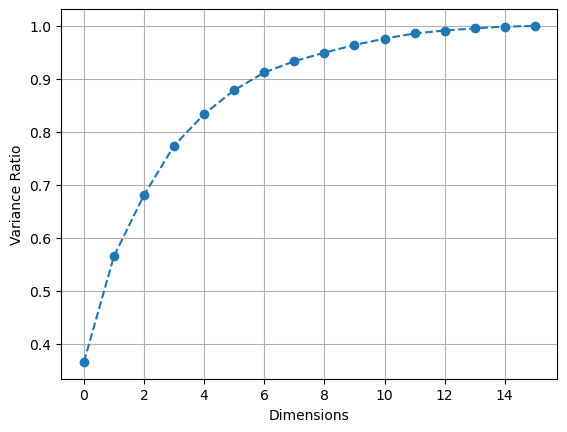

In [20]:
# melakukan PCA pada dataset model dan menampilkan hasilnya ke dalam grafik

pca=PCA()
pca.fit(df_model)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum,'o--')
plt.xlabel("Dimensions")
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [21]:
# menghitung VIF untuk menentukan kolinearitas pada semua kolom

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
X = df_model.iloc[:,:-1]
calc_vif(X)

variables        VIF
0                            BALANCE   7.214489
1                  BALANCE_FREQUENCY   4.596702
2                          PURCHASES  36.441211
3                   ONEOFF_PURCHASES  19.959021
4             INSTALLMENTS_PURCHASES  11.510598
5                       CASH_ADVANCE   4.495810
6                PURCHASES_FREQUENCY  25.028021
7         ONEOFF_PURCHASES_FREQUENCY   8.753220
8   PURCHASES_INSTALLMENTS_FREQUENCY  21.585095
9             CASH_ADVANCE_FREQUENCY   8.505373
10                  CASH_ADVANCE_TRX   9.248593
11                     PURCHASES_TRX   8.536075
12                      CREDIT_LIMIT   4.050234
13                          PAYMENTS   3.751147
14                  MINIMUM_PAYMENTS   5.110606

`Dari hasil VIF kita hanya akan menggunakan kolom dengan nilai VIF di bawah 10. Maka jumlah kolom yang akan kita gunakan dalam jumlah komponen PCA adalah 10 principal components. Dari grafik di atas, dengan mereduksi features menjadi 10 principal components maka kita masih mendapatkan informasi >>90% dari dataset model`

In [23]:
# membuat dataset model setelah PCA

pca = PCA(n_components=10)
df_model_reduced = pd.DataFrame(pca.fit_transform(df_model))
df_model_reduced.columns = pca.get_feature_names_out()
df_model_reduced

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0    -0.591108 -0.348991  0.066637 -0.337961  0.114643  0.052579 -0.020628   
1    -0.467840 -0.218425  0.063203 -0.541732 -0.112968  0.067010 -0.187835   
2    -0.320650 -0.082110  0.275405 -0.613299 -0.060978  0.092600 -0.227747   
3    -0.550307 -0.101748 -0.072695 -0.476412 -0.035414  0.231115  0.012490   
4    -0.476917 -0.559124  0.606791 -0.156372  0.513143 -0.181266 -0.051360   
...        ...       ...       ...       ...       ...       ...       ...   
4311 -0.814906  0.196925 -0.061448  0.036451 -0.355014 -0.141027 -0.280700   
4312 -0.856310  0.398396  0.184818  0.462747 -0.191000 -0.151643 -0.334152   
4313  0.210595  0.678182 -0.056082 -0.010939 -0.177145 -0.542812  0.435856   
4314 -0.262440  1.333387  0.338159  0.228328 -0.186370 -0.298267  0.364221   
4315  0.209076  0.863236 -0.462551  0.796609 -0.180796 -0.550259 -0.145433   

          pca7      pca8      pca9  
0    -0.026326  0.008882 -0.053884  
1    -0.001770  0.036710  0.102564  
2    -0.073501  0.118876  0.352998  
3    -0.008273 -0.024913 -0.021171  
4    -0.161087  0.090734  0.249310  
...        ...       ...       ...  
4311 -0.163420  0.068516 -0.051912  
4312  0.347443  0.054096 -0.061292  
4313  0.008009 -0.238943 -0.194627  
4314 -0.428648  0.076521  0.208450  
4315  0.029249  0.071015  0.009516  

[4316 rows x 10 columns]

In [78]:
full_pipe = Pipeline([
    ('wins', Winsorizer(capping_method='iqr', fold=3, tail='both', variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                                                                                'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'])),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=10, svd_solver='full'))])

## KMeans Evaluation

### Elbow Method

#### Before PCA

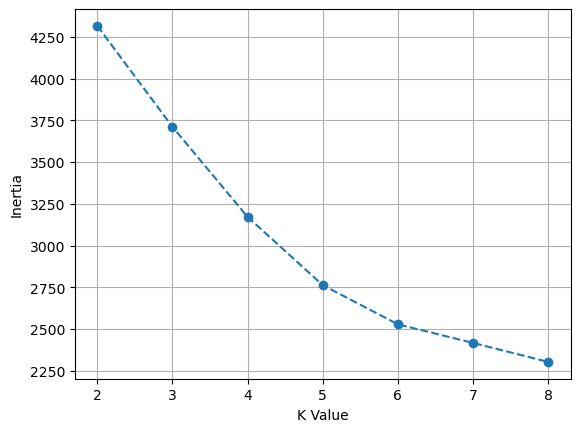

In [25]:
# mencari nilai K di mana penurunan nilai inersia mulai melambat

K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i,n_init='auto',random_state=34).fit(df_model).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

`Secara visual dari hasil grafik di atas penurunan nilai K mulai melambat terjadi antara K=5 atau K=6. Untuk memastikan nilai K kita bisa melakukan langkah selanjutnya menggunakan KneeLocator`

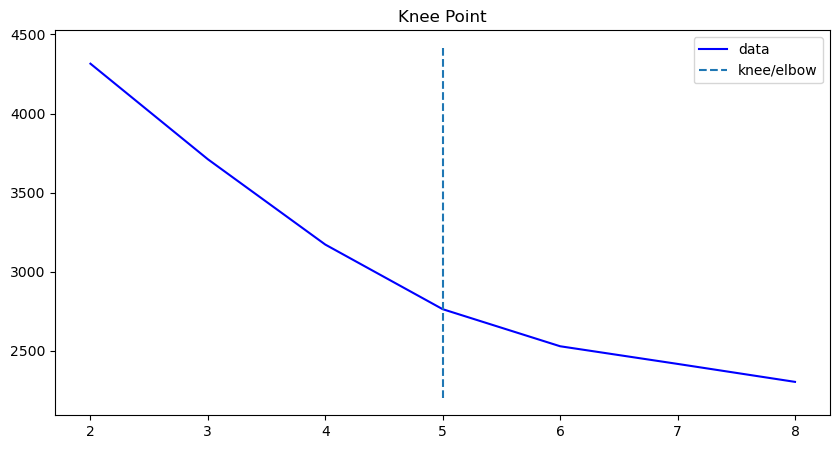

In [26]:
# menentukan nilai K optimal

kneedle = KneeLocator(K,inertia,curve="convex", direction='decreasing')
kneedle.plot_knee(figsize=(10,5))

`Dari hasil KneeLocator didapat nilai K=5. Ini berarti, menurut elbow method, pembagian dataset menjadi 5 cluster akan menghasilkan performa clustering yang maksimal`

#### After PCA

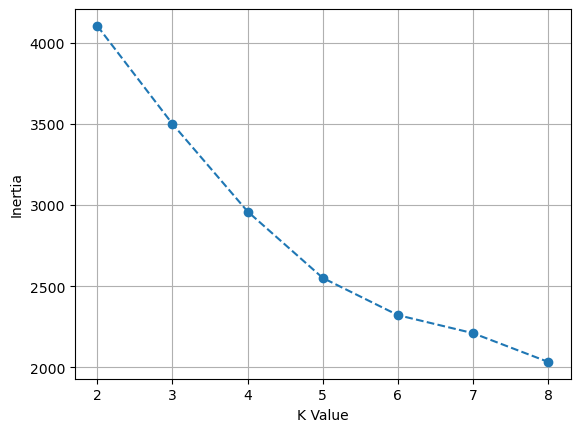

In [27]:
# mencari nilai K di mana penurunan nilai inersia mulai melambat dari dataset setelah PCA

K=[2,3,4,5,6,7,8]
inertia_pca=[KMeans(n_clusters=i,n_init='auto',random_state=34).fit(df_model_reduced).inertia_ for i in K]
plt.plot(K,inertia_pca,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

`Secara visual dari hasil grafik di atas penurunan nilai K mulai melambat terjadi antara K=5 atau K=6. Untuk memastikan nilai K kita bisa melakukan langkah selanjutnya menggunakan KneeLocator`

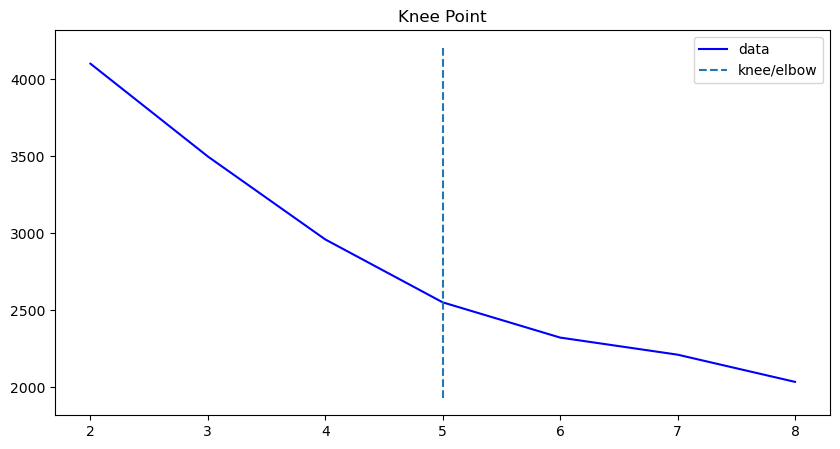

In [28]:
# # menentukan nilai K optimal dari dataset hasil PCA

kneedle_pca = KneeLocator(K,inertia_pca,curve="convex", direction='decreasing')
kneedle_pca.plot_knee(figsize=(10,5))

`Dari hasil KneeLocator didapat nilai K=5. Ini berarti, menurut elbow method, pembagian dataset menjadi 5 cluster akan menghasilkan performa clustering yang maksimal`

` Hasil evaluasi pada dataset menggunakan elbow method adalah 5 cluster baik sebelum ataupun sesudah PCA`

### Silhouette Method

#### Before PCA

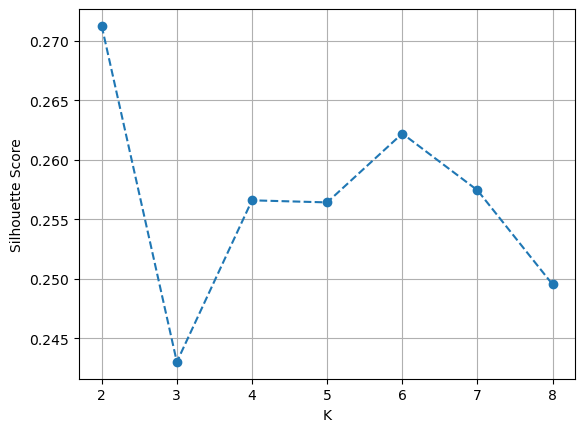

In [29]:
# mencari silhouette score

K=[2,3,4,5,6,7,8]
s_score_slc=[silhouette_score(df_model, KMeans(n_clusters=i,n_init='auto',random_state=34).fit(df_model).labels_) for i in K]

plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

`Bentuknya tidak semulus seperti hasil elbow method, maka kita akan menggunakan KneeLocator untuk menentukan nilai K yang optimal`

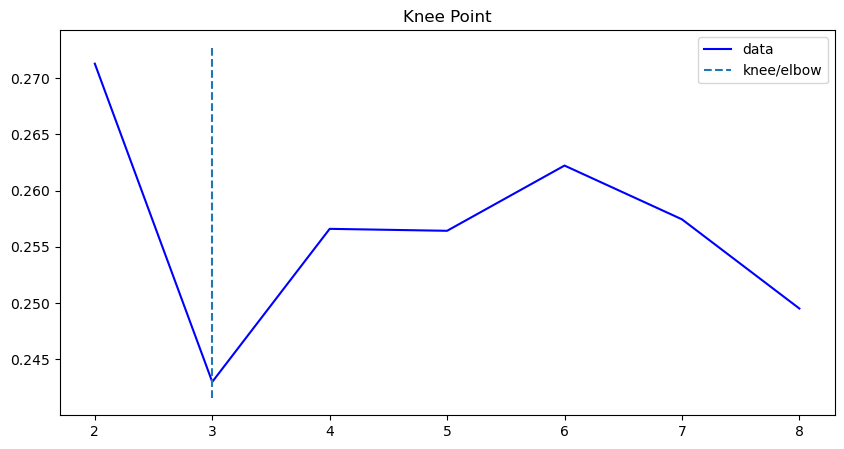

In [30]:
# mencari K optimal

kneedle_sil = KneeLocator(K,s_score_slc,curve="convex", direction='decreasing')
kneedle_sil.plot_knee(figsize=(10,5))

`Hasil silhouette score menunjukkan jumlah cluster sama dengan 3 akan menghasilkan model yang baik. Kita juga bisa menampilkan secara visual pembagian cluster tersebut ke dalam gambar seperti proses setelah ini`

In [31]:
# membuat fungsi untuk menampilkan hasil silhouette method

def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.271157615902274
For n_clusters = 3 The average silhouette_score is : 0.24579439864638689
For n_clusters = 4 The average silhouette_score is : 0.2565995630543183
For n_clusters = 5 The average silhouette_score is : 0.2565916498224672
For n_clusters = 6 The average silhouette_score is : 0.26260578329216727
For n_clusters = 7 The average silhouette_score is : 0.2554255876604415
For n_clusters = 8 The average silhouette_score is : 0.2557166798171919


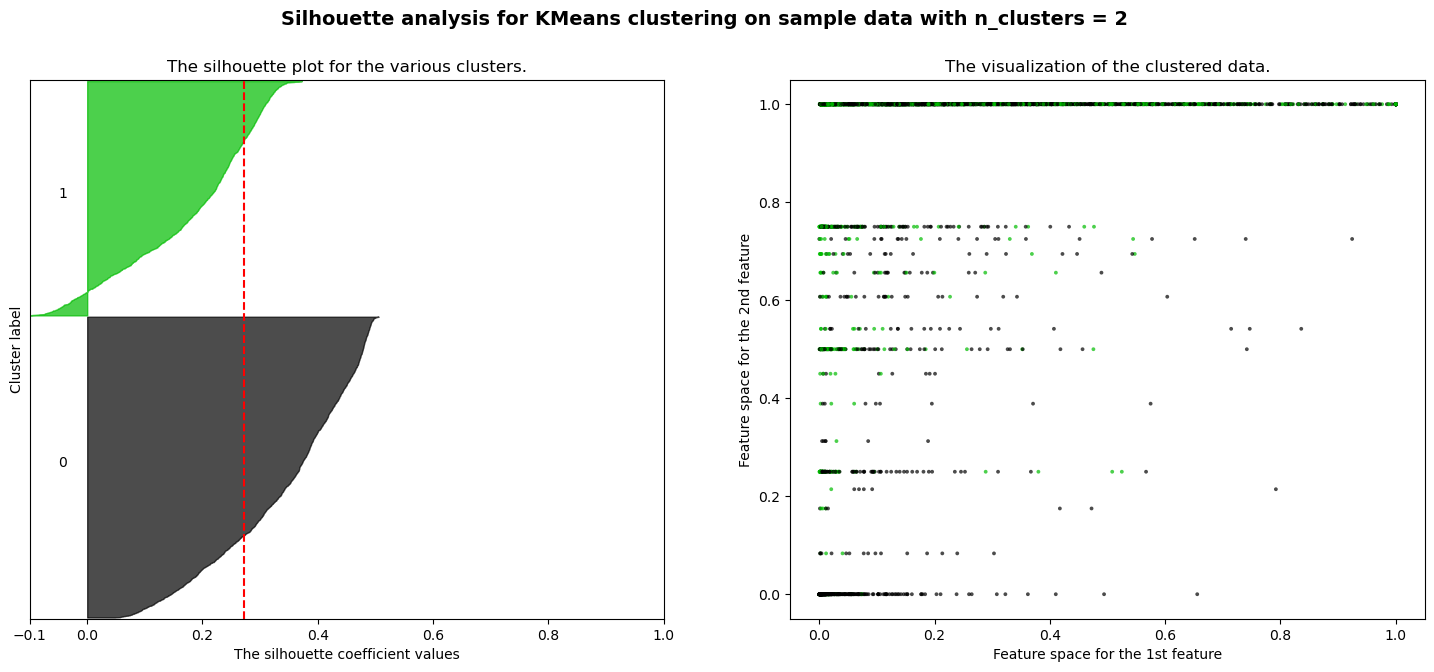

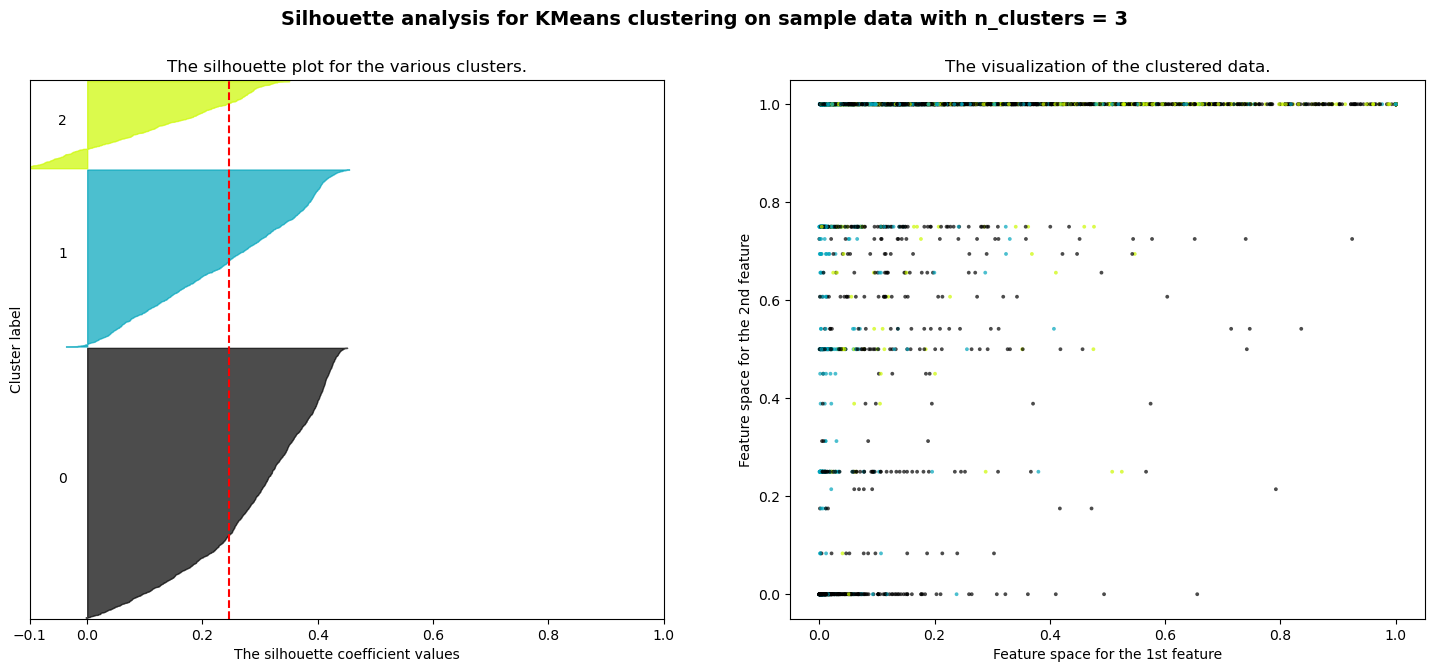

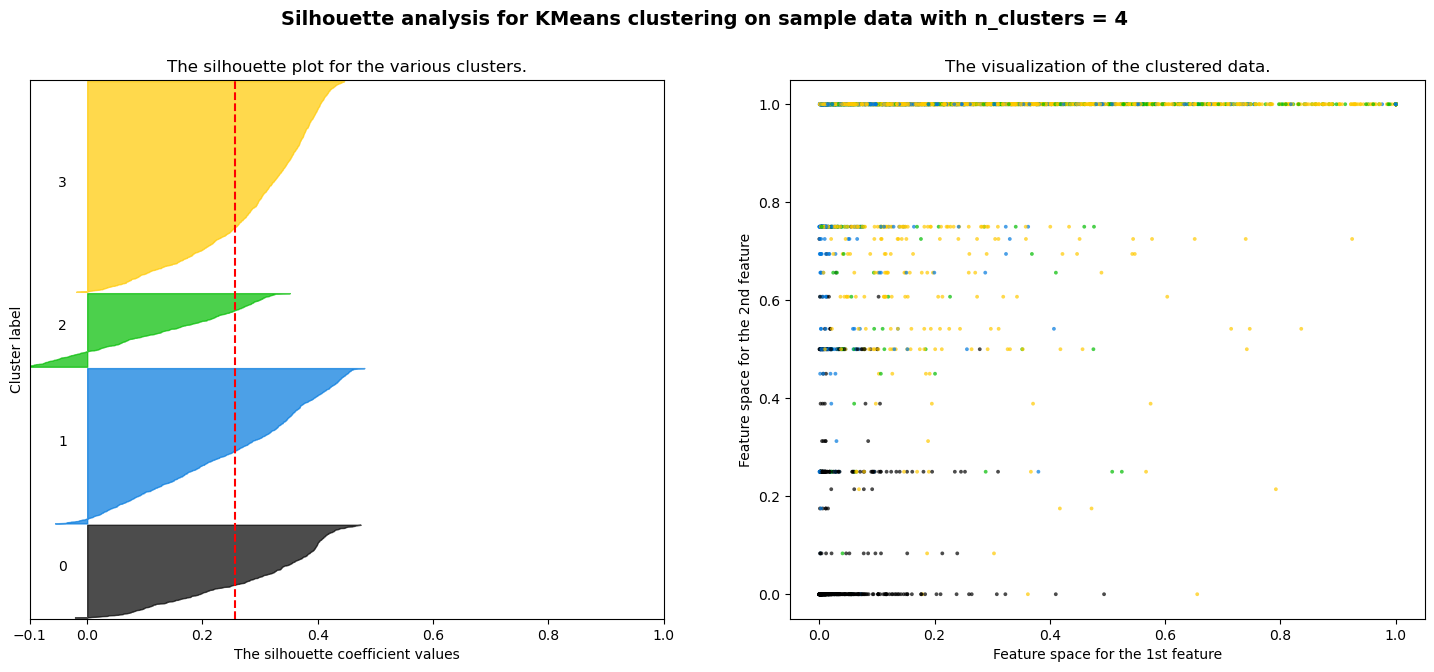

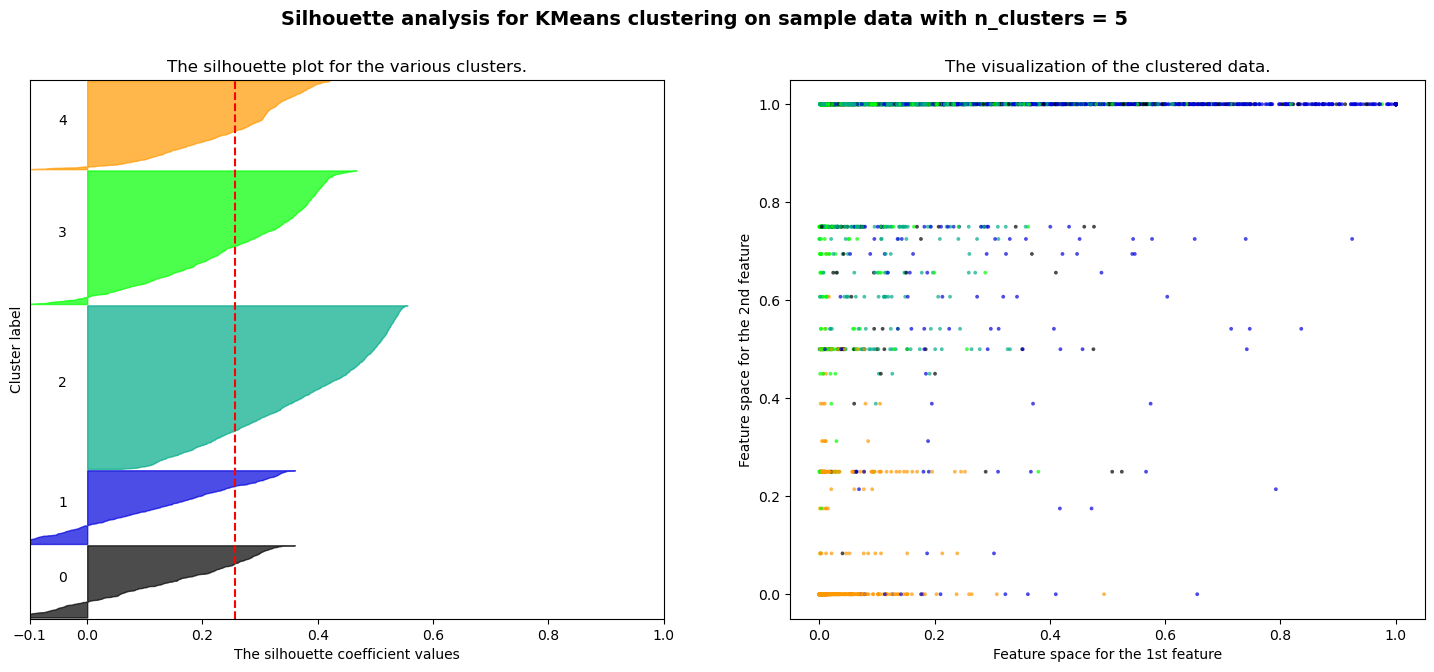

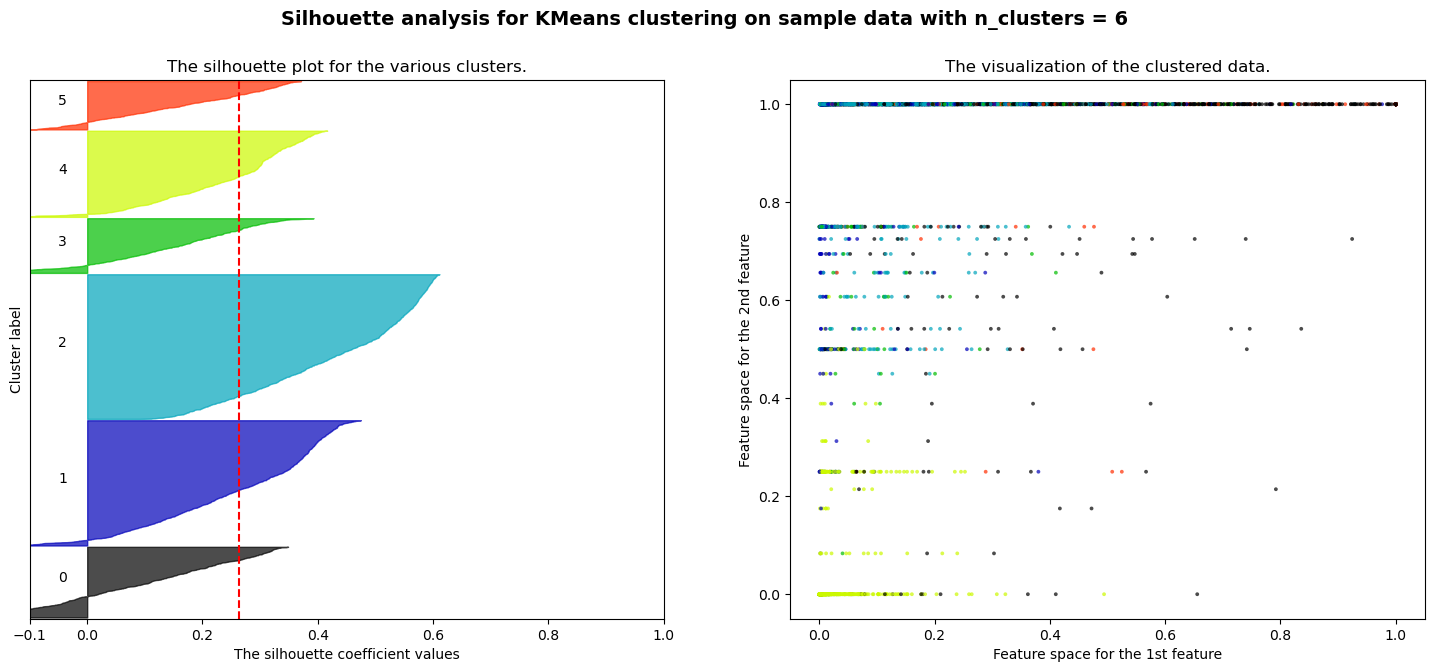

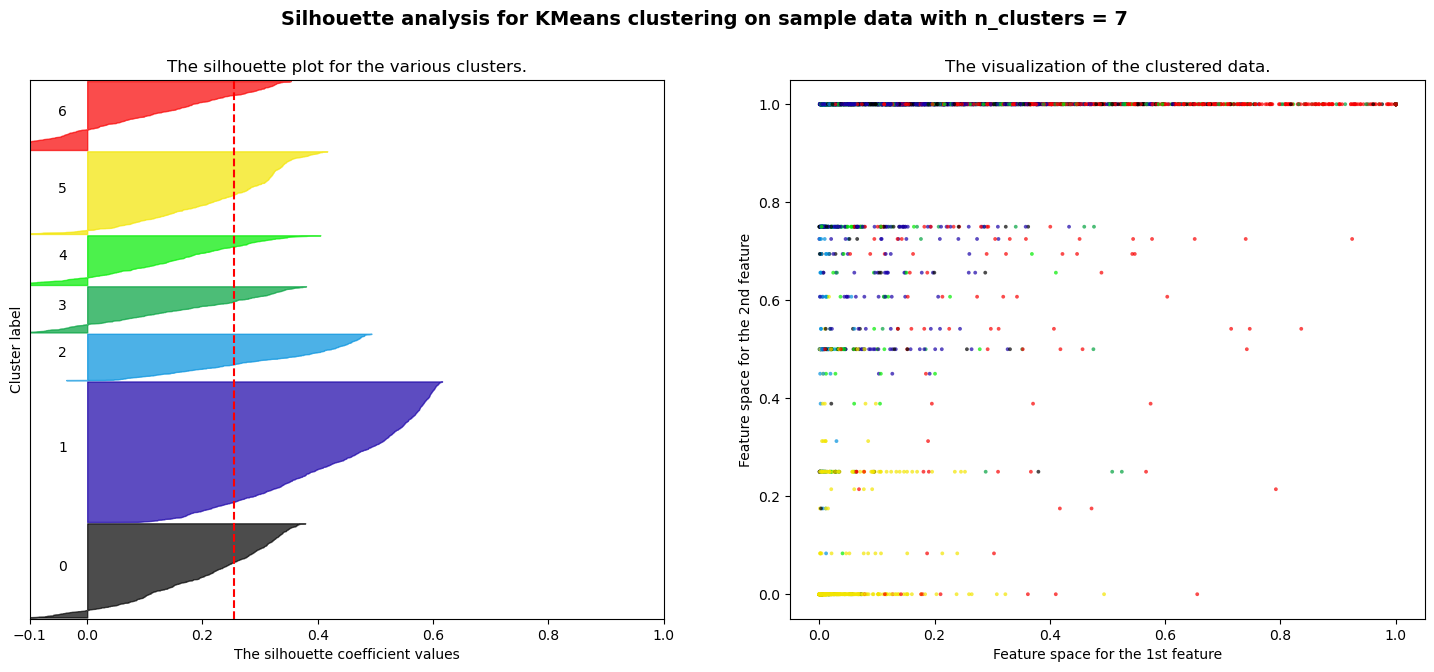

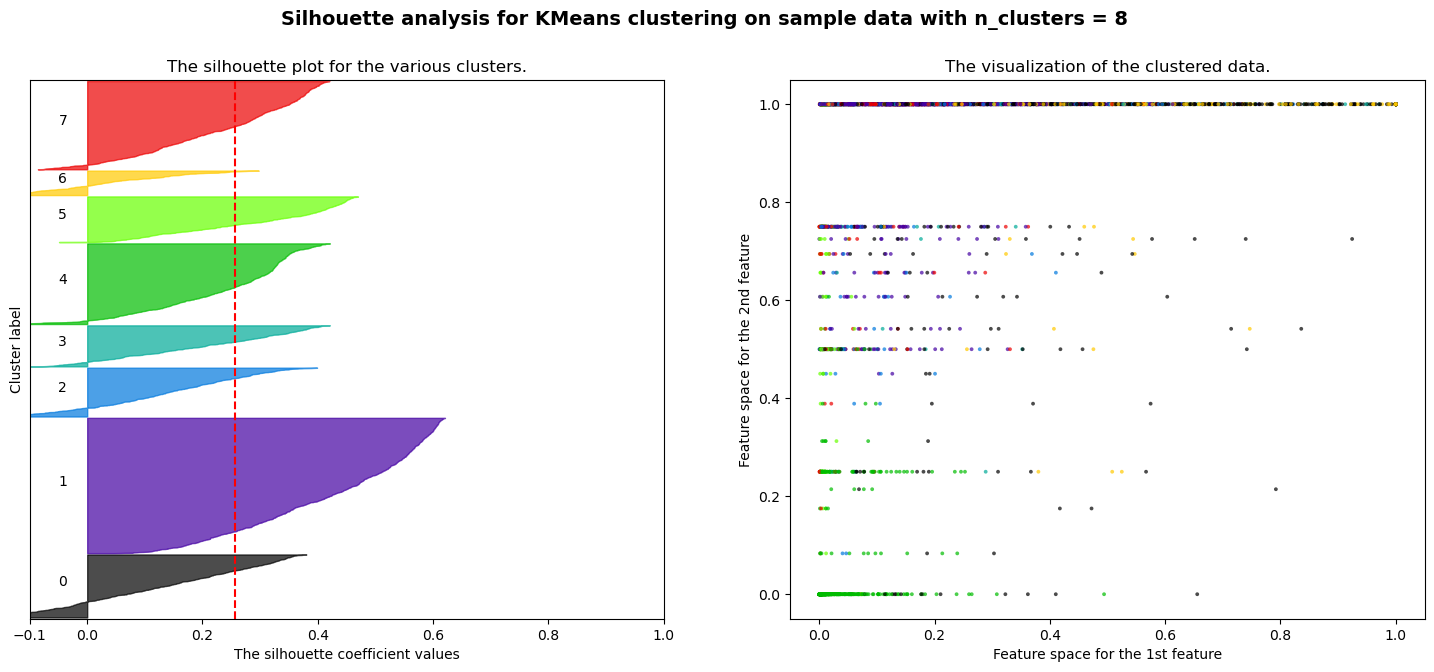

In [32]:
# visualisasi silhouette methode untuk berbagai macam nilai K

K = [2,3,4,5,6,7,8]
plot_silhouette(KMeans,K,df_model.values,'KMeans')

`Dari hasil visualisasi silhouette method kita bisa melihat proporsi jumlah antar cluster dan melihat ada atau tidaknya kebocoran cluster atau cluster yang tumpang tindih. Hasil plotting di sebelah kanan belum terlihat dengan jelas karena masih memiliki dimensi yang banyak maka perlu dilakukan reduksi dimensi dengan PCA`

#### After PCA

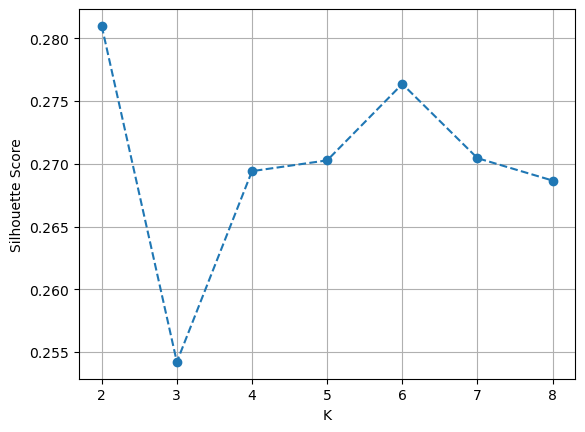

In [33]:
# menampilkan hasil silhouette method pada grafik dari data hasil PCA

K=[2,3,4,5,6,7,8]
s_score_slc_pca=[silhouette_score(df_model_reduced, KMeans(n_clusters=i,n_init='auto',random_state=34).fit(df_model_reduced).labels_) for i in K]

plt.plot(K,s_score_slc_pca,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

`Kita akan menggunakan KneeLocator untuk menentukan K optimal`

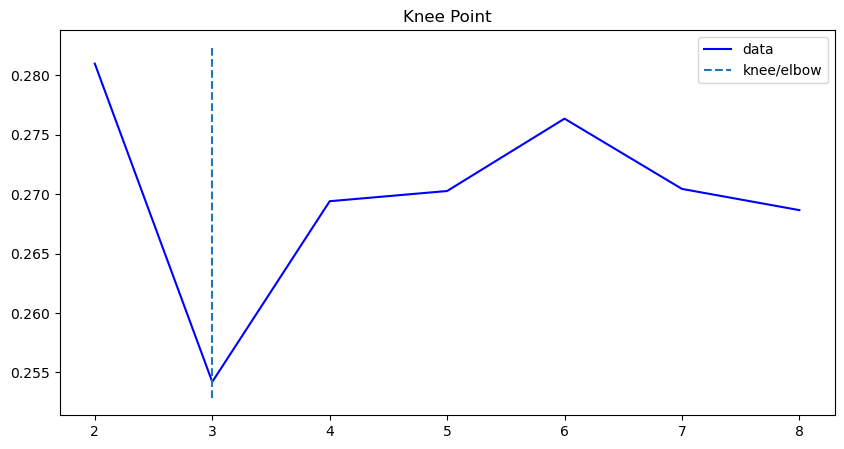

In [34]:
# mencari K optimal dari data hasil PCA

kneedle_sil_pca = KneeLocator(K,s_score_slc_pca,curve="convex", direction='decreasing')
kneedle_sil_pca.plot_knee(figsize=(10,5))

`Hasil silhouette method dengan bantuan KneeLocator menunjukkan 3 adalah jumlah cluster yang optimal`

For n_clusters = 2 The average silhouette_score is : 0.28093994871630973
For n_clusters = 3 The average silhouette_score is : 0.25653772156408067
For n_clusters = 4 The average silhouette_score is : 0.2694152738610285
For n_clusters = 5 The average silhouette_score is : 0.27035040511162123
For n_clusters = 6 The average silhouette_score is : 0.2763252998172552
For n_clusters = 7 The average silhouette_score is : 0.2702561025334886
For n_clusters = 8 The average silhouette_score is : 0.270886738371995


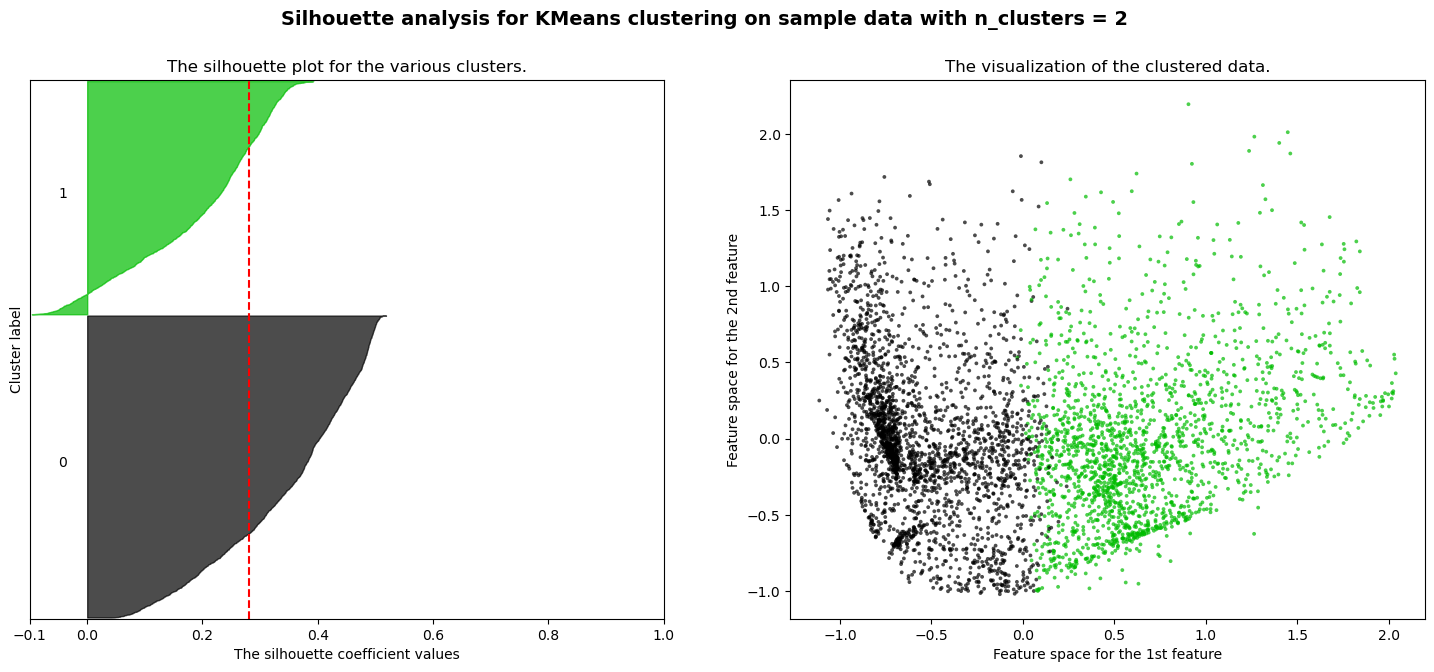

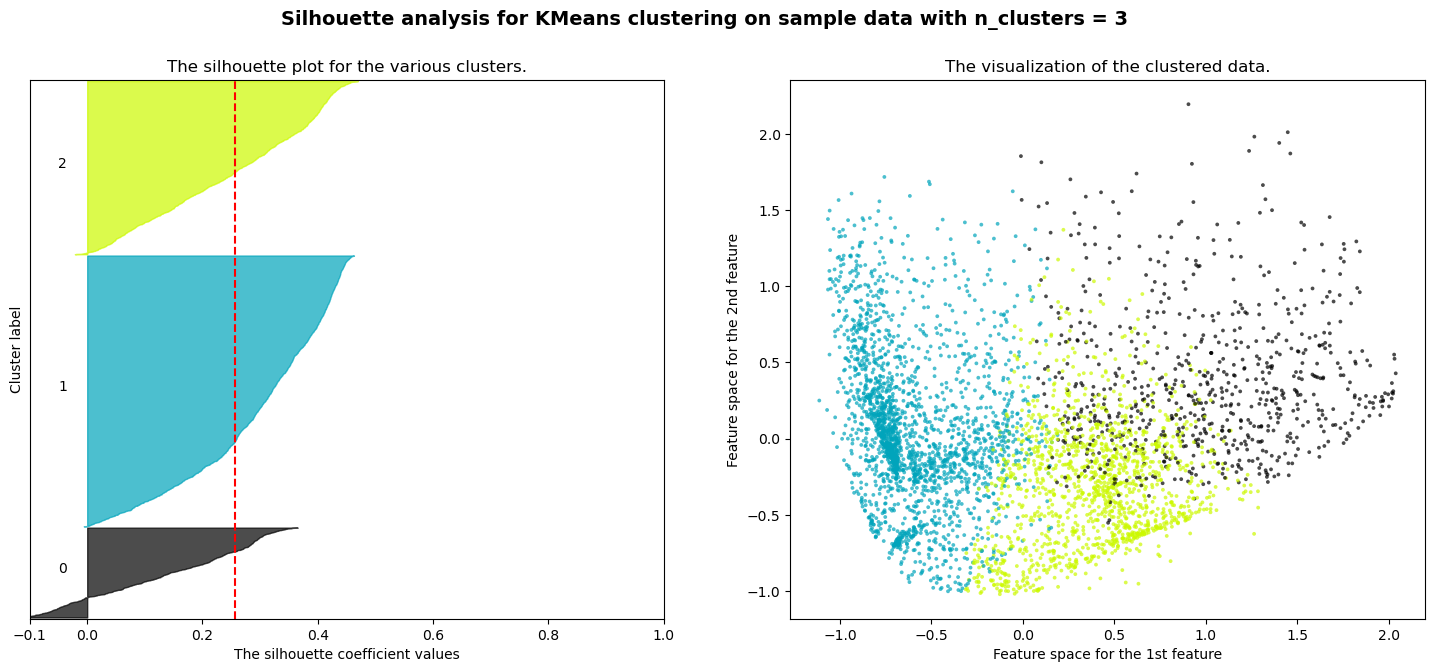

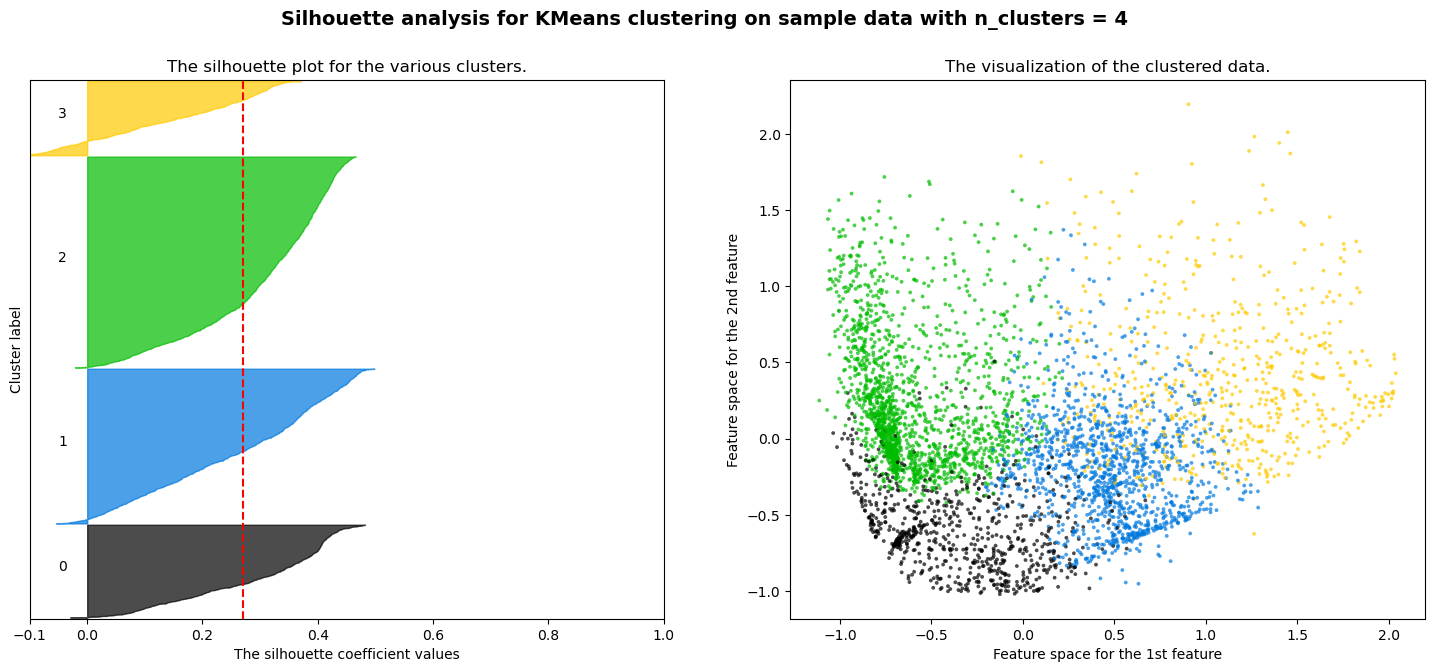

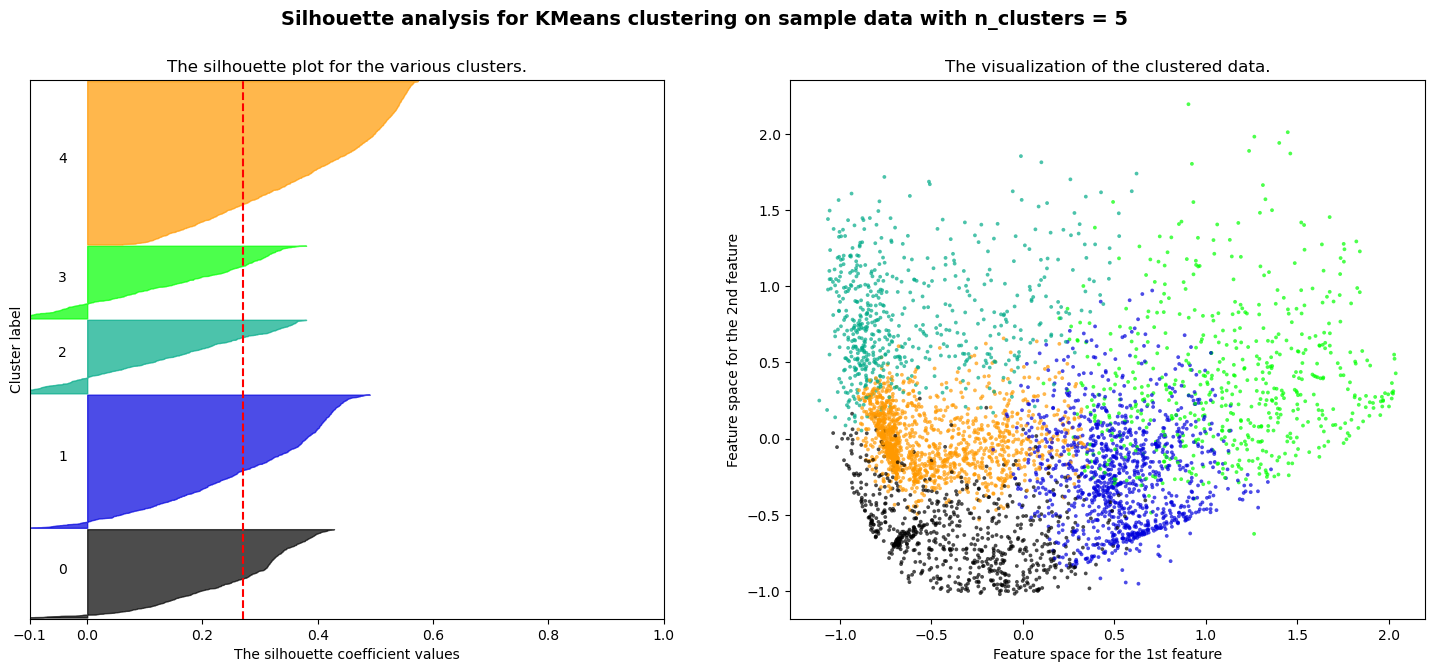

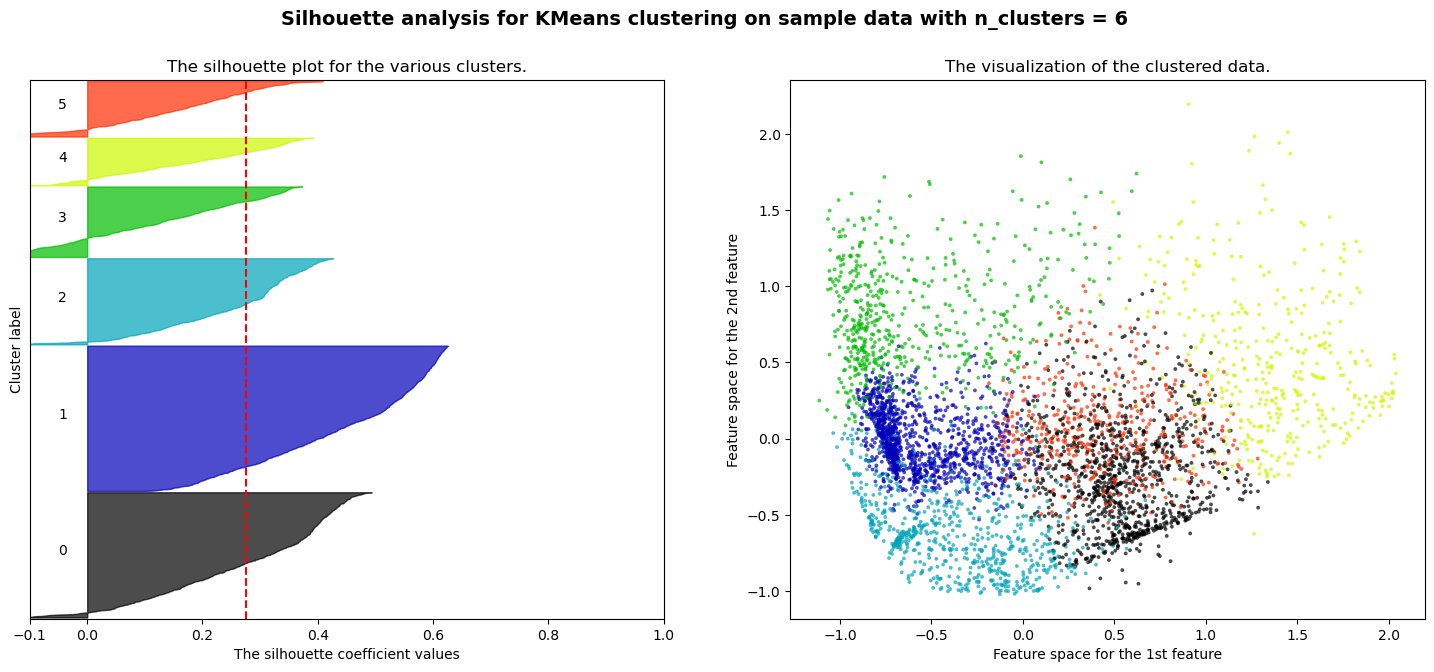

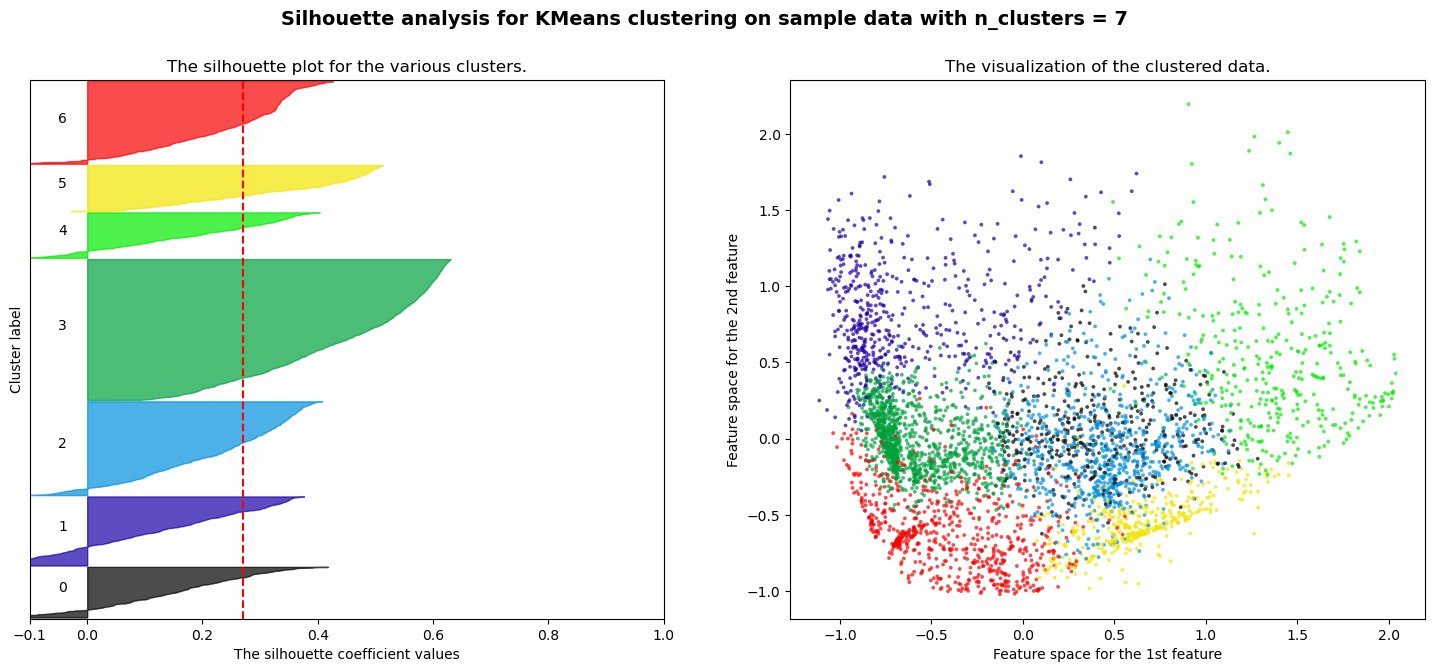

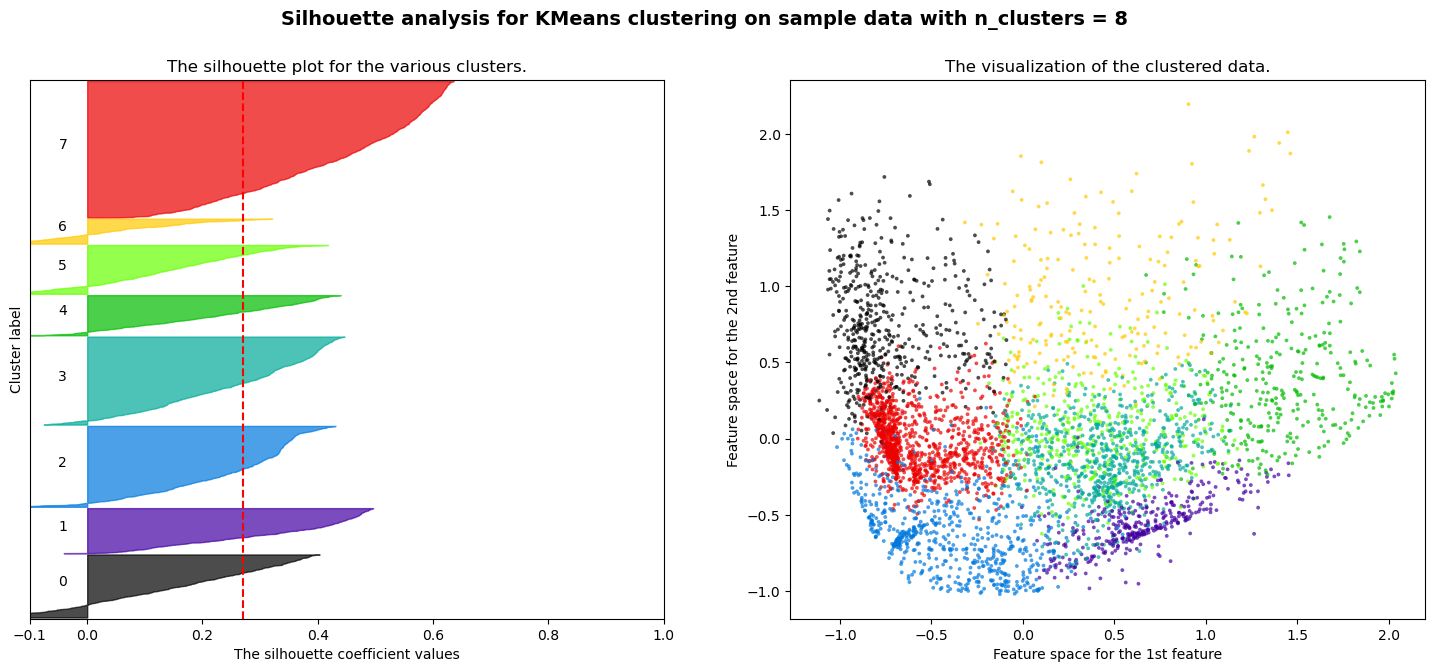

In [35]:
# visualisasi silhouette methode untuk berbagai macam nilai K

K = [2,3,4,5,6,7,8]
plot_silhouette(KMeans,K,df_model_reduced.values,'KMeans')

`Dari hasil visualisasi terlihat makin tinggi jumlah cluster maka semakin besar kemungkinan ada tumpang tindih antar cluster atau tidak ada batas yang jelas antar cluster. Maka walaupun model yang baik adalah model yang memiliki silhouette score yang besar tetapi tidak serta merta kita memakai nilai K nya sebagai jumlah cluster, kita juga perlu memperhitungkan jumlah cluster nya agar tidak terlalu banyak karena ada kemungkinan kebocoran antar cluster. Dari sini juga kita bisa melihat proporsi jumlah data antar cluster.`

## Model Definition

`Dari hasil silhouette method di atas kita akan menggunakan K=3 sebagai jumlah cluster pada dataset karena proporsi data antar cluster relatif seimbang dan kebocoran sedikit. Sebetulnya jika melihat silhouette score, 2 cluster mempunyai skor yang lebih tinggi dari 3 cluster tapi disini kami berdasarkan personal judgement menilai 2 cluster terlalu sedikit.`

In [36]:
# menginisiasi model K-Means

kmn =  KMeans(n_clusters=3,random_state=34)  # menggunakan jumlah 3 cluster
df['K-Means'] = kmn.fit_predict(df_model)  # melakukan pelatihan model dan memprediksi label pada tiap entri data lalu membuat kolom baru pada dataset yang berisi hasil prediksi label 
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1        1902   943.584041           0.875000     103.00            103.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
5        4266  2237.238086           1.000000     120.00            120.00   
7        4680   424.994385           0.375000    1200.00           1200.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  K-Means  
1      215.325023        410.484825          0.000000       8        1  
3      258.032630        151.696433          0.000000       8        1  
4      397.090516        227.143184          0.000000       8        1  
5      343.102984        712.986387          0.000000       8        1  
7       57.266292         56.720210          0.000000       8        1  
...           ...               ... 

## Model Inference

In [68]:
df_inf = df.sample(5, random_state=34)
df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4426      492  2783.614341           1.000000    1725.05            700.05   
2659     2986   777.853474           0.666667       0.00              0.00   
875      5356   865.161494           1.000000     857.80            362.33   
753      3930   684.658511           1.000000     184.68              0.00   
4090     5198   644.933911           0.833333       7.26              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4426                 1025.00   1004.424902             0.916667   
2659                    0.00   1820.143378             0.000000   
875                   495.47      0.000000             1.000000   
753                   184.68      0.000000             1.000000   
4090                    7.26    966.749372             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4426                    0.333333                          0.750000   
2659                    0.000000                          0.000000   
875                     0.583333                          1.000000   
753                     0.000000                          1.000000   
4090                    0.000000                          0.166667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4426                0.416667                 5             18        5000.0   
2659                0.500000                 8              0        2000.0   
875                 0.000000                 0             37        1200.0   
753                 0.000000                 0             12        2900.0   
4090                0.166667                 1              1        1500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  K-Means  
4426   812.534656        934.885255               0.0      12        0  
2659    89.741508        173.276205               0.0       6        1  
875   1152.947700        212.715695               0.0      12        0  
753   2837.204108        350.274370               0.4      12        0  
4090   431.732367         92.246251               0.0       6        1

In [81]:
wins_skw = Winsorizer(capping_method='iqr', fold=3, tail='both', variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                                                                            'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS',
                                                                            ])
df_inf_clean = wins_skw.fit_transform(df_inf)

In [82]:
df_inf_model = pd.DataFrame(scaler.fit_transform(df_inf_clean))
df_inf_model.columns = scaler.get_feature_names_out()

In [84]:
pca = PCA(n_components=5, svd_solver='full')
df_inf_reduced = pd.DataFrame(pca.fit_transform(df_inf_clean))
df_inf_reduced.columns = pca.get_feature_names_out()

In [85]:
kmn =  KMeans(n_clusters=3,random_state=34)  # menggunakan jumlah 3 cluster
df_inf['K-Means'] = kmn.fit_predict(df_inf_model)  # melakukan pelatihan model dan memprediksi label pada tiap entri data lalu membuat kolom baru pada dataset yang berisi hasil prediksi label 
df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4426      492  2783.614341           1.000000    1725.05            700.05   
2659     2986   777.853474           0.666667       0.00              0.00   
875      5356   865.161494           1.000000     857.80            362.33   
753      3930   684.658511           1.000000     184.68              0.00   
4090     5198   644.933911           0.833333       7.26              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4426                 1025.00   1004.424902             0.916667   
2659                    0.00   1820.143378             0.000000   
875                   495.47      0.000000             1.000000   
753                   184.68      0.000000             1.000000   
4090                    7.26    966.749372             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4426                    0.333333                          0.750000   
2659                    0.000000                          0.000000   
875                     0.583333                          1.000000   
753                     0.000000                          1.000000   
4090                    0.000000                          0.166667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4426                0.416667                 5             18        5000.0   
2659                0.500000                 8              0        2000.0   
875                 0.000000                 0             37        1200.0   
753                 0.000000                 0             12        2900.0   
4090                0.166667                 1              1        1500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  K-Means  
4426   812.534656        934.885255               0.0      12        2  
2659    89.741508        173.276205               0.0       6        0  
875   1152.947700        212.715695               0.0      12        1  
753   2837.204108        350.274370               0.4      12        1  
4090   431.732367         92.246251               0.0       6        0

## Exploratory Data Analysis (EDA) for Cluster Characteristics

In [37]:
data = df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','K-Means']]

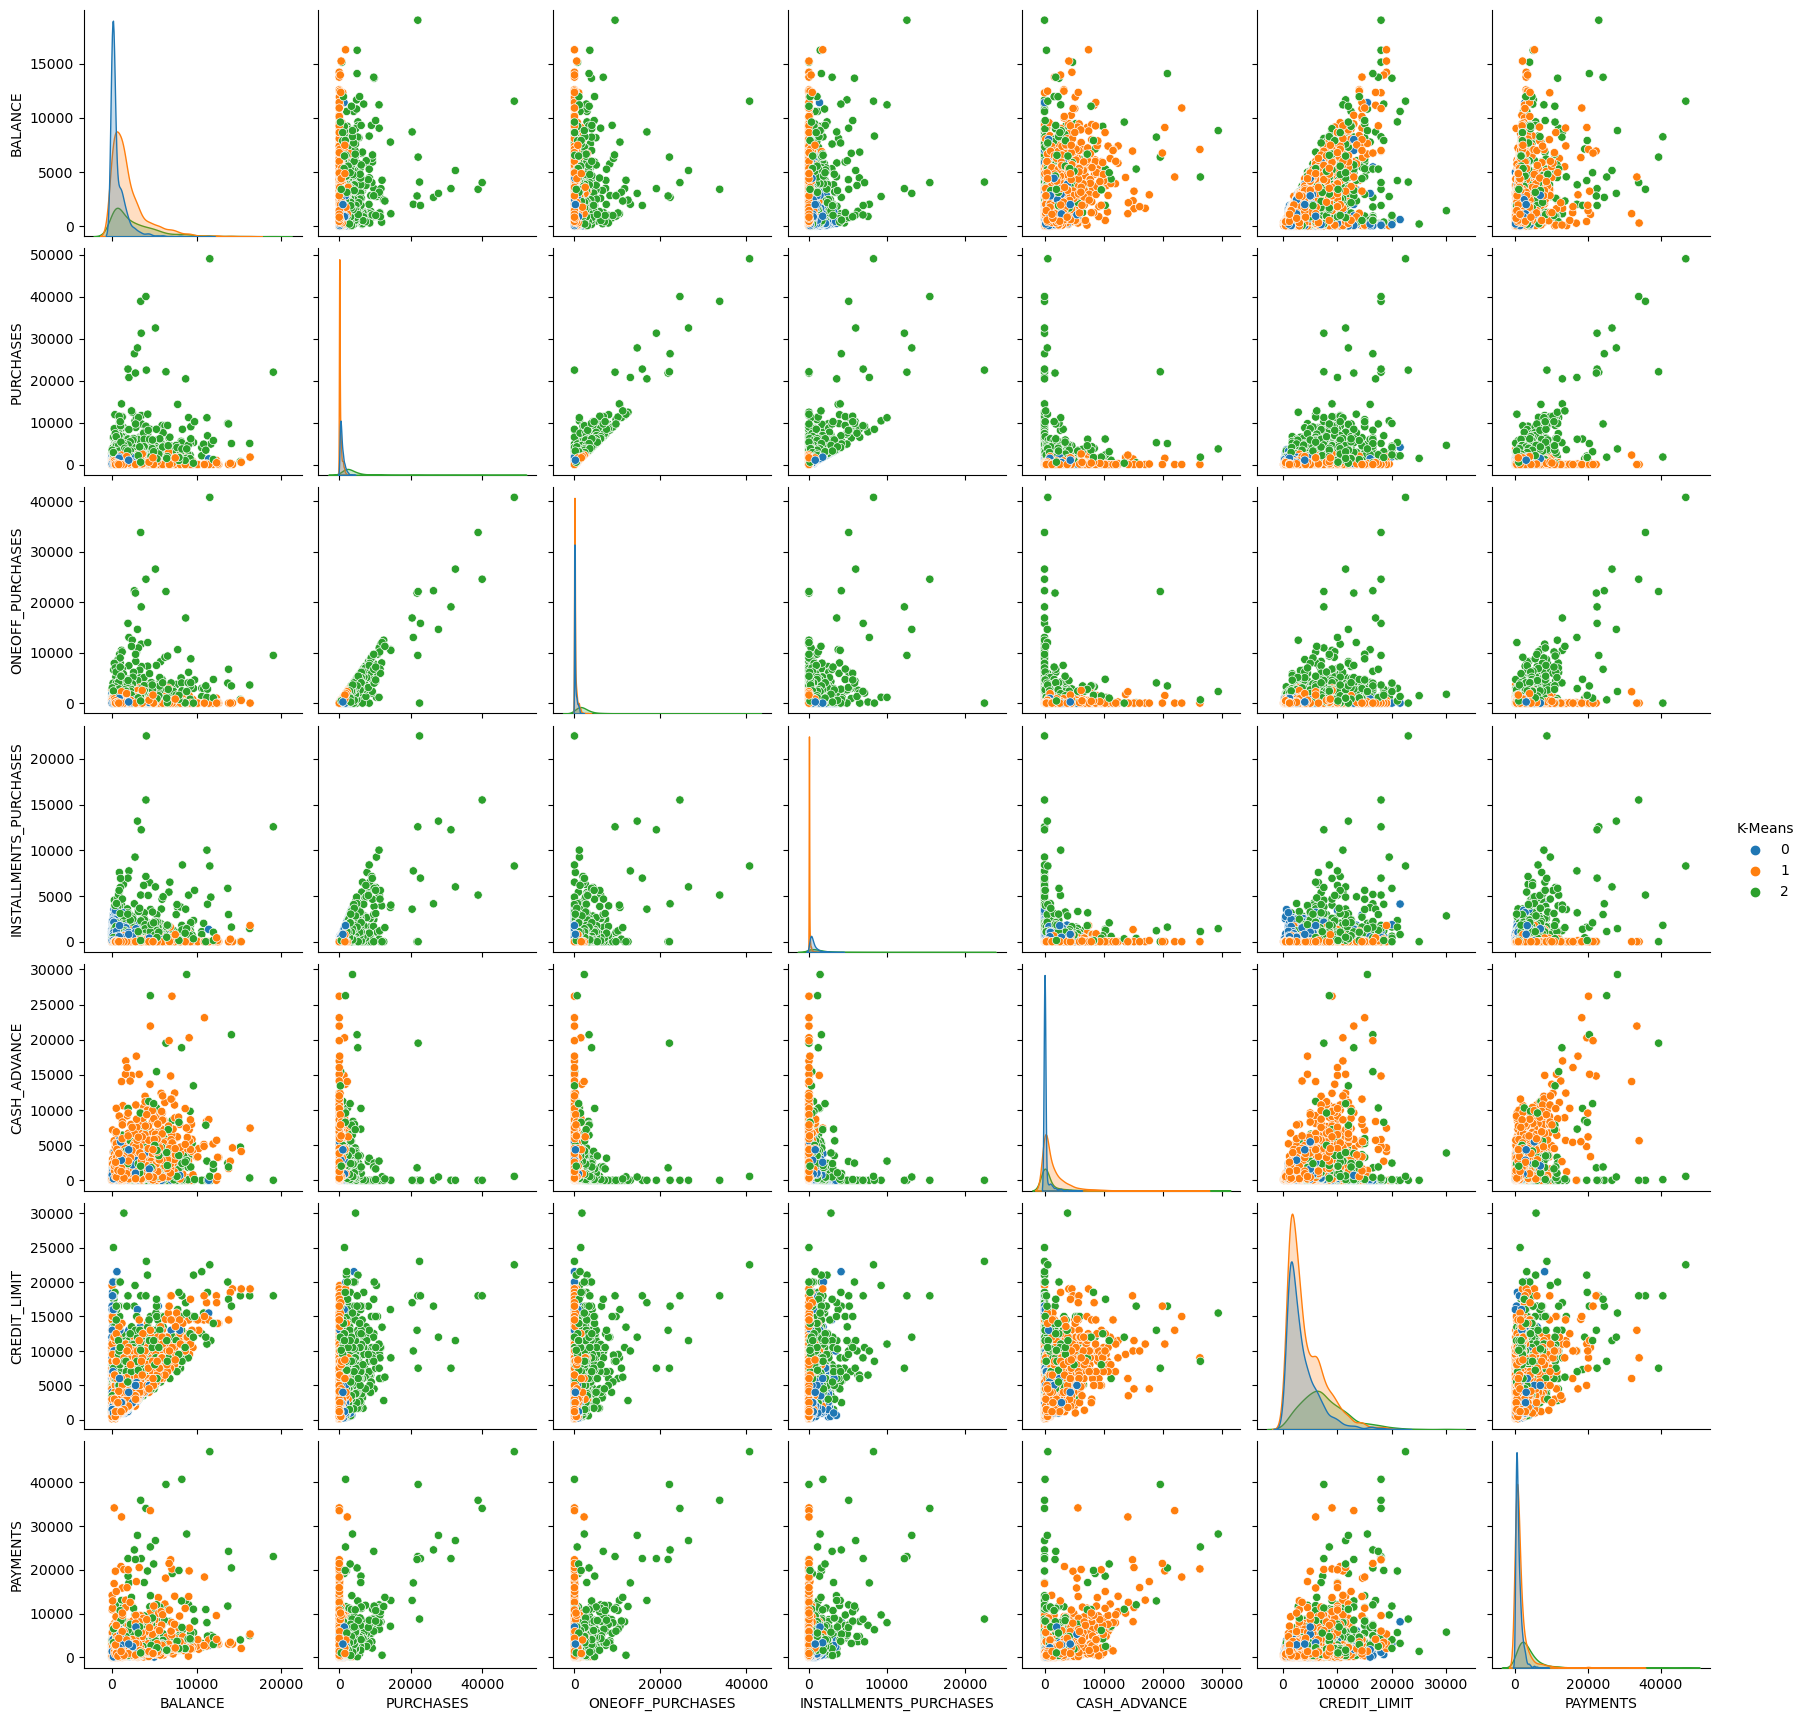

In [38]:
# menampilkan scatterplot antar kolom

sns.pairplot(data=data,hue='K-Means',palette='tab10')

```
- Antara PURCHASES, ONEOFF_PURCHASES, dan INSTALLMENTS_PURCHASES berkorelasi linear

- Antara CREDIT_LIMIT, BALANCE, dan PAYMENTS berkorelasi linear
``` 

<Axes: ylabel='K-Means'>

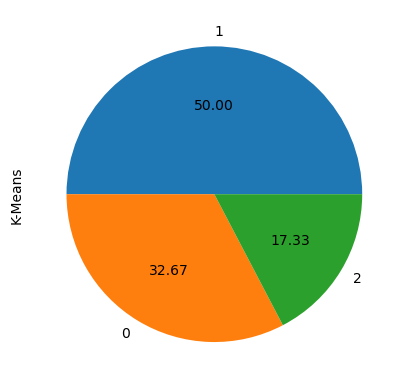

In [39]:
# visualisasi proporsi data tiap cluster

df['K-Means'].value_counts().plot(kind='pie',autopct='%.2f')

`Jumlah data di cluster 1 customer adalah mayoritas dari total seluruh customer. Ini bisa jadi perhatian kita dalam menentukan strategi promosi dimana kenaikan penggunaan kartu kredit di cluster ini bisa menghasilkan kenaikan yang cukup besar. Kita perlu meninjau lebih lanjut karakteristik tiap cluster agar dapat menentukan promosi yang tepat.`

In [62]:
# mengelompokkan kolom besaran transaksi berdasarkan label cluster

a = df.groupby('K-Means',as_index=False)[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT']].mean()
a

K-Means      BALANCE    PURCHASES  ONEOFF_PURCHASES  \
0        0   629.234442   734.504433        172.476113   
1        1  1913.936789   247.418753        205.954319   
2        2  2524.863736  3817.515922       2547.171751   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
0              562.823057    189.394714   3483.449961   935.458635   
1               41.693040   1532.163319   4153.846154  1571.719356   
2             1270.409679    917.584932   7555.858046  4006.353894   

   PRC_FULL_PAYMENT  
0          0.295555  
1          0.052415  
2          0.232155

`Untuk mempermudah pembacaan maka akan dilakukan visualisasi di bawah ini`

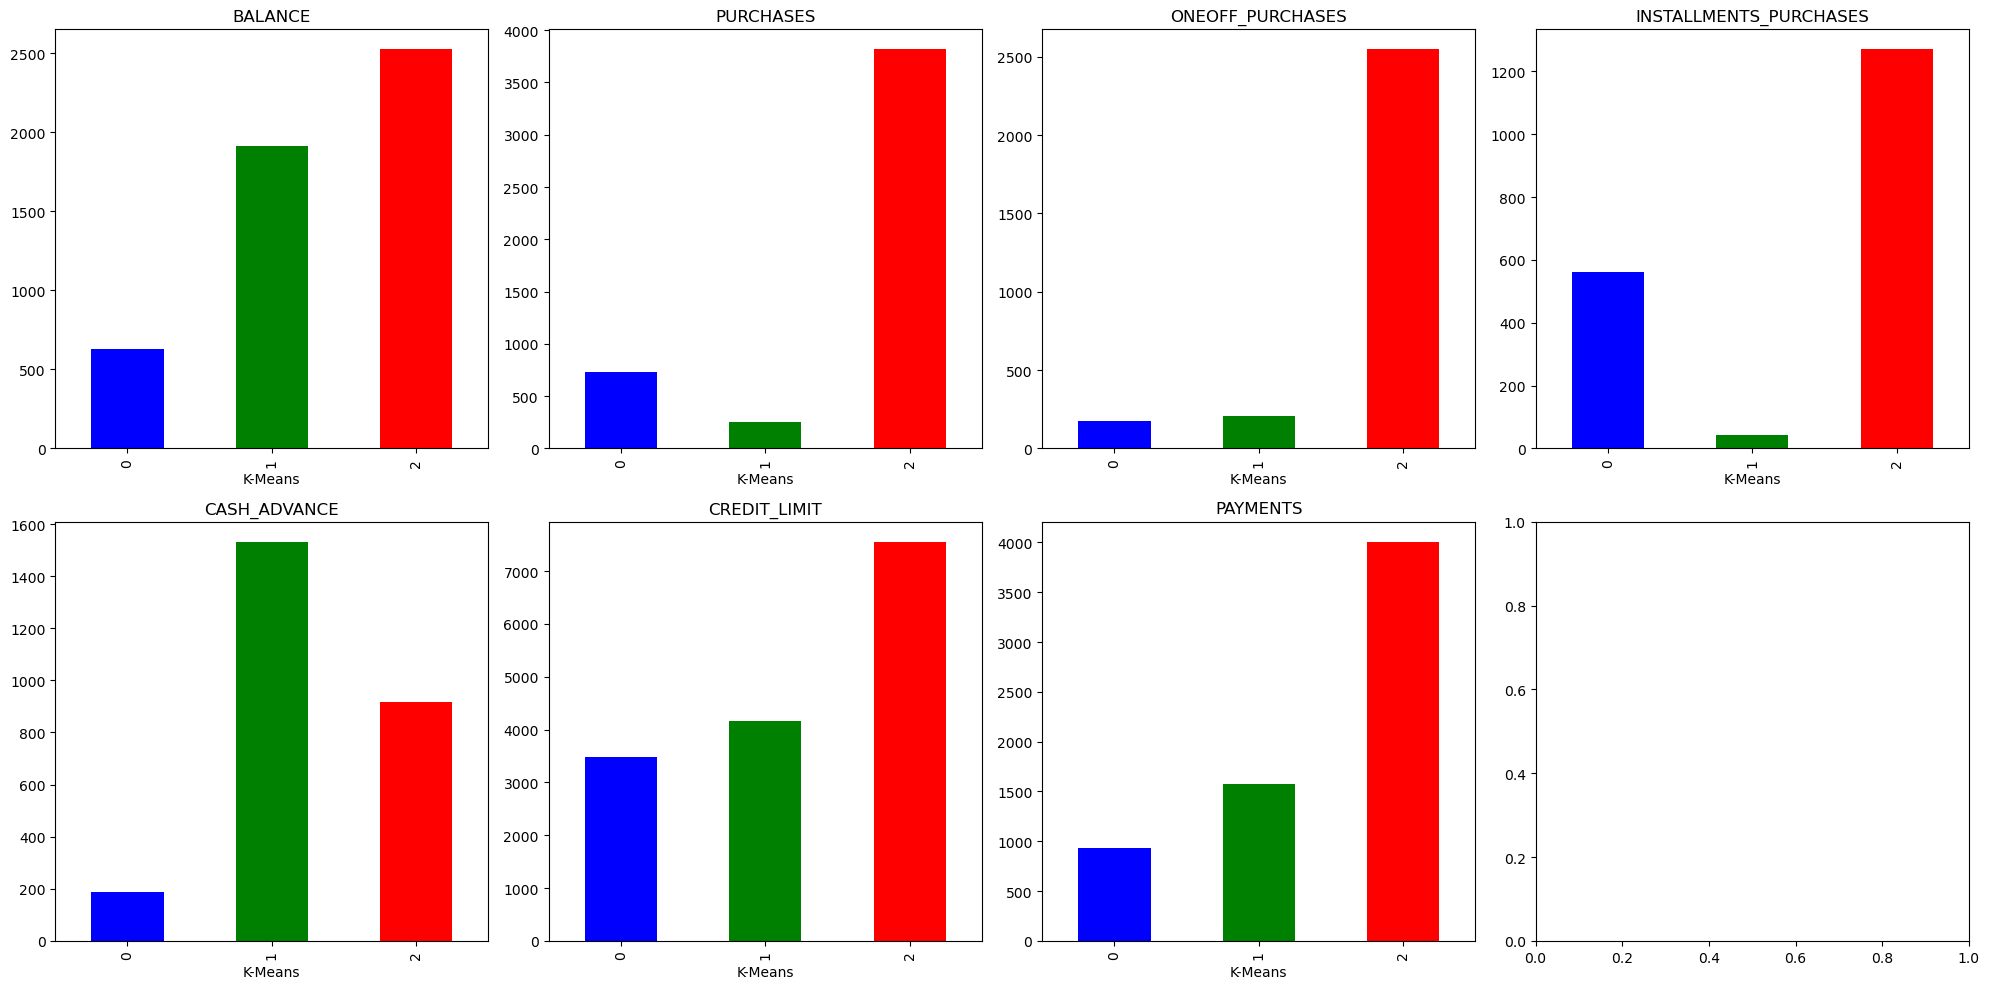

In [57]:
# visualisasi kolom besaran transaksi

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (feature, title) in enumerate(zip(data.iloc[:, :7].columns, data.iloc[:, :7].columns)):
    ax = axes[i // 4, i % 4]
    df.groupby('K-Means')[feature].mean().plot(kind='bar', ax=ax,color=['blue','green','red'])
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [63]:
# mengelompokkan kolom frequensi berdasarkan label cluster

df.groupby('K-Means')[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']].mean()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
K-Means                                                                       
0                 0.885557             0.810480                    0.129815   
1                 0.872243             0.145834                    0.092704   
2                 0.979815             0.911559                    0.673284   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  
K-Means                                                            
0                                0.704432                0.038331  
1                                0.052391                0.211647  
2                                0.654773                0.103225

`Untuk mempermudah pembacaan maka akan dilakukan visualisasi di bawah ini`

In [59]:
data_freq= df[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','K-Means']]

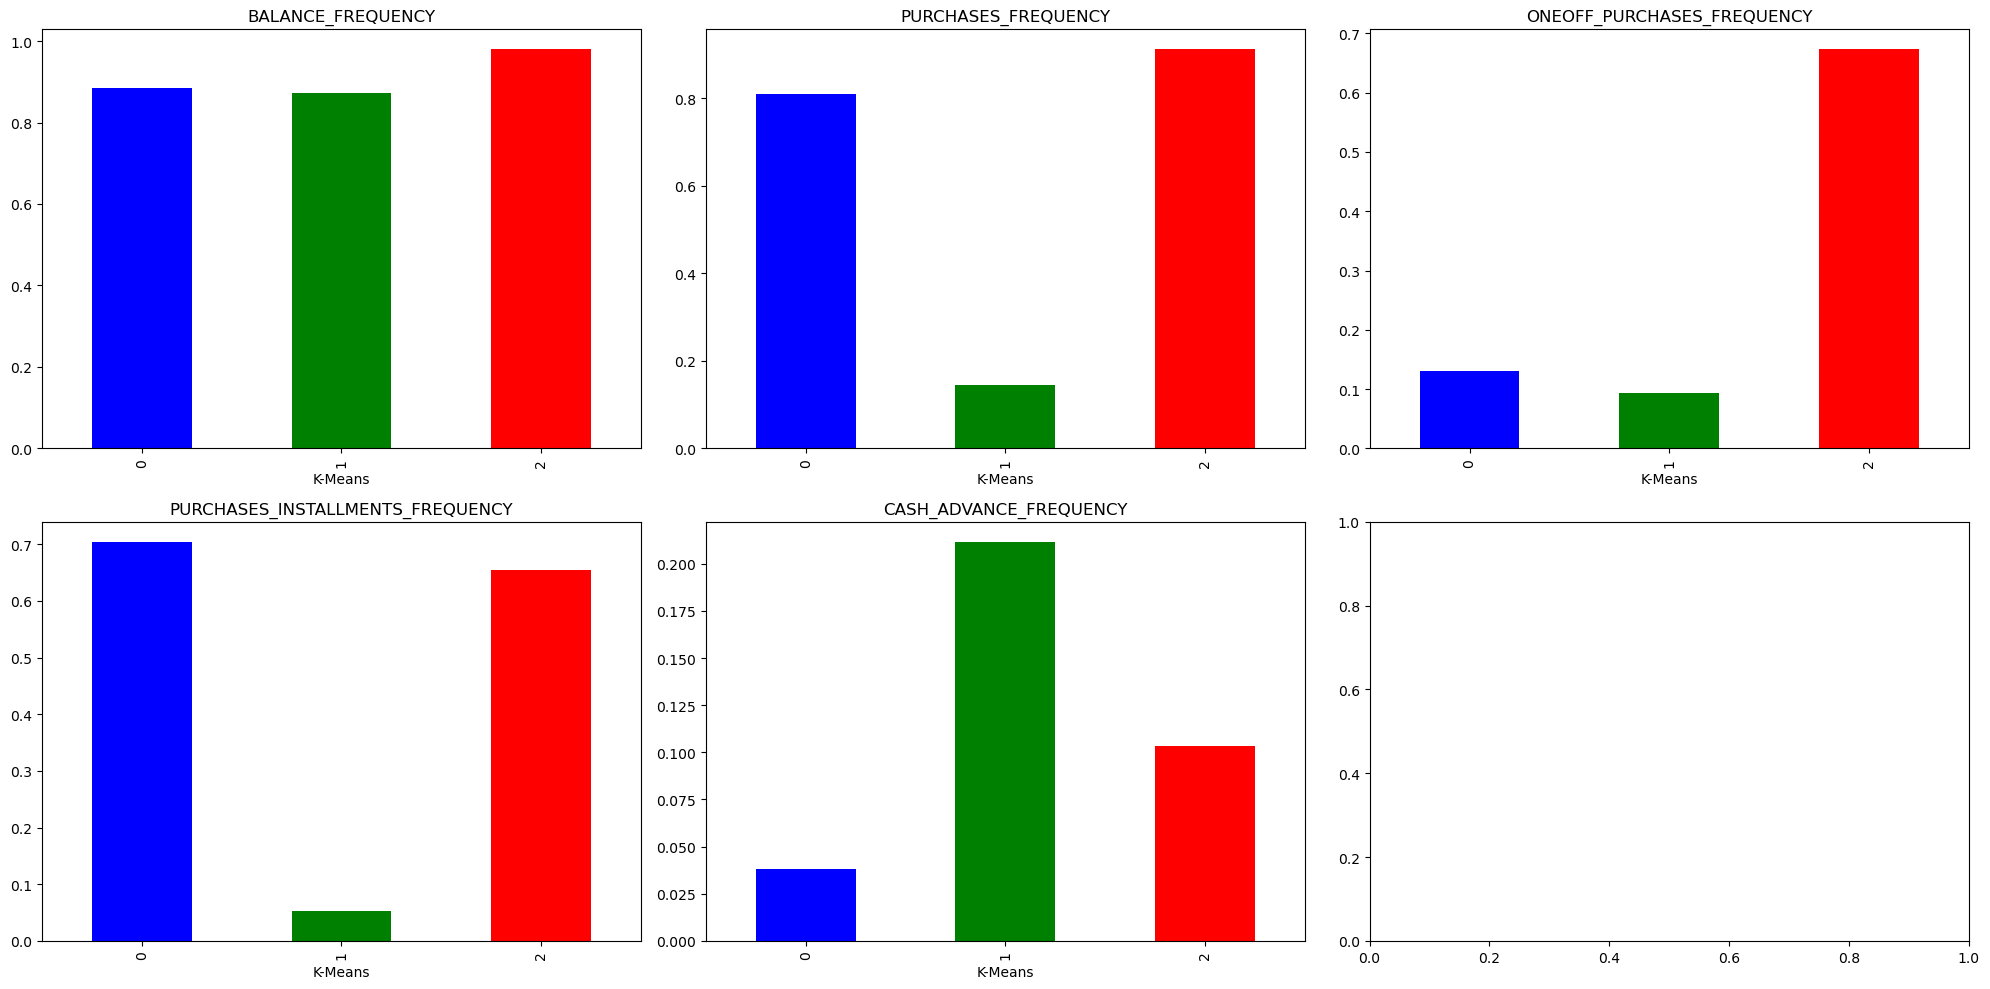

In [60]:
# visualisasi kolom frequency

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (feature, title) in enumerate(zip(data_freq.iloc[:, :5].columns, data_freq.iloc[:, :5].columns)):
    ax = axes[i // 3, i % 3]
    df.groupby('K-Means')[feature].mean().plot(kind='bar', ax=ax,color=['blue','green','red'])
    ax.set_title(title)

plt.tight_layout()
plt.show()

<Axes: ylabel='TENURE'>

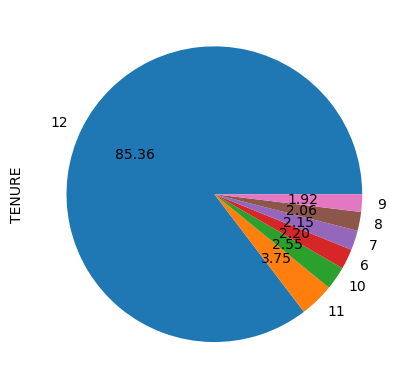

In [66]:
# visualisasi proporsi kolom Tenor

df['TENURE'].value_counts().plot(kind='pie',autopct='%.2f')

`Mayoritas customer memilih tenor dalam 12 bulan untuk pembelian sesuatu dengan cara cicilan`

### Cluster Characteristics

```
Dari hasil visualisasi di atas dapat disimpulkan karakteristik tiap cluster adalah :

- Cluster 0
    Credit limit rendah, jarang melakukan tarik tunai dengan kartu kredit maka otomatis jumlah tarik tunainya juga kecil, sering membeli sesuatu dengan cara cicilan maka otomatis jumlah pembelian dengan cara cicilan cukup besar, lebih sering menggunakan kartu kredit untuk belanja tetapi barang yang dibeli bukan barang yang mahal

- Cluster 1
    Credit limit sedang, sangat sering melakukan tarik tunai dengan kartu kredit maka otomatis jumlah tarik tunainya juga besar, jarang menggunakan kartu kredit untuk belanja maka otomatis jumlah belanja dengan kartu kredit juga kecil, jarang membeli sesuatu dengan cara cicilan dengan kartu kredit

- Cluster 2
    Credit limit tinggi, cukup sering melakukan tarik tunai dengan kartu kredit, sering belanja, sering membeli sesuatu dengan cara cicilan, sering membeli barang-barang mahal
```

## Conceptual Problems

### 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

`Inertia adalah nilai yang menjadi tolok ukur model unsupervised learning algoritma K-Means. Inertia disebut juga WCSS (Within Clusters Sum Squared). Perhitungan inertia adalah dengan menghitung jarak tiap titik data dengan centroid nya, lalu jarak tersebut dikuadratkan, lalu hasil kuadrat tersebut di satu cluster dijumlahkan. Model yang baik adalah model yang memiliki inertia rendah dengan tetap memperhatikan nilai K atau jumlah cluster. Karena semakin banyak cluster semakin kecil inertia, jadi ada semacam tradeoff antara inertia dan jumlah cluster. Jumlah cluster yang optimal bisa didapatkan dengan elbow method.`

### 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

`Elbow method adalah metode untuk menentukan jumlah cluster yang akan menghasilkan model yang optimal, dimana titik elbow adalah titik dimana penurunan nilai inertia mulai mengalami perlambatan. Elbow method digunakan karena ada tradeoff antara inertia dengan jumlah cluster. Semakin banyak jumlah cluster maka semakin kecil nilai inertia. Model clustering yang baik bukan hanya memiliki nilai inertia kecil tapi juga harus memperhatikan jumlah cluster, tidak boleh terlalu banyak. Kelebihan dari elbow method adalah mudah digunakan, interpretasi secara visual lebih mudah. Kita hanya perlu mencari dimana elbow point, secara visual kadang sudah bisa dilakukan, jika tidak bisa dipastikan secara visual bisa memanfaatkan library Kneed dengan KneeLocator nya. Kekurangannya adalah kita tidak bisa mengetahui proporsi data antar cluster, kita juga tidak bisa melihat apakah antar cluster yang telah kita buat ada tumpang tindih atau tidak.`

## Conclusions

```
Saat ini bersinggungan dengan bank dalam transaksi keuangan kita sehari-hari sangat sulit dielakkan. Bank sudah menjadi inti dari sistem transaksi keuangan kita. Bank menawarkan banyak layanan pada masyarakat, salah satunya adalah menerbitkan kartu kredit.

Sebuah bank yang menerbitkan kartu kredit pasti mempunyai data transaksi dari customer pemegang kartu kreditnya. Data ini bisa digunakan untuk mengecek ketidakwajaran transaksi yang mengindikasikan fraud (penipuan). Selain itu data customer ini juga dapat digunakan untuk memetakan customer kartu kredit ke dalam beberapa cluster atau segmentasi customer. Segmentasi tersebut bisa dimanfaatkan oleh pihak bank untuk mengetahui perilaku customer kartu kredit per clusternya sehingga bisa menawarkan promo-promo kartu kredit yang membuat customer lebih sering menggunakan kartu kreditnya.

Berdasarkan hasil permodelan, kita membagi customer menjadi 3 cluster. Cluster 0 memiliki credit limit paling rendah dan sering memakai kartu kreditnya untuk membayar sesuatu dan membeli sesuatu dengan cara cicilan. Cluster 1 memiliki credit limit yang sedikit lebih tinggi dari cluster 0 tapi lebih sering menggunakan kartu kreditnya untuk melakukan tarik tunai. Sedangkan untuk cluster 2, customer disini memiliki credit limit paling tinggi dengan perilaku transaksinya adalah sering menggunakan kartu kreditnya untuk pembayaran sesuatu dan membeli sesuatu dengan cara cicilan, yang membedakan dengan cluster 0 adalah cluster 2 membeli barang-barang dengan harga mahal. Dari clustering tersebut kita bisa menentukan strategi untuk meningkatkan penggunaan kartu kredit atau menjaga loyalitas customer per clusternya.

Untuk cluster 0 kita bisa menawarkan promo cicilan ringan mengingat cluster ini cukup sering membeli sesuatu dengan cara cicilan. Cluster 1 bisa ditawari diskon tarik tunai, program cashback dari tarik tunai tersebut, dan program reward dimana tiap transaksi akan mendapatkan poin reward dan jika sudah mencapai poin tertentu bisa ditukar dengan hadiah atau manfaat lainnya. Sedangkan untuk cluster 2, bank bisa menawarkan diskon di toko-toko tertentu seperti toko barang mewah atau barang-barang branded jika customer menggunakan kartu kreditnya. Bank juga bisa menawarkan asuransi pembelian terhadap barang mewah yang baru dibeli dengan kartu kredit. Untuk tenor cicilan sebaiknya dijadikan satu jenis saja yaitu 12 bulan karena mayoritas customer memiliki tenor tersebut.

Untuk mengembangkan pasar atau mencari customer baru kita bisa mengacu pada proporsi data per cluster dimana cluster 1 adalah jumlah customer paling banyak (50%). Kita bisa fokus ke calon customer dengan perilaku transaksi seperti itu. Tapi ada baiknya bank perlu menambahkan data-data demografi seperti umur dan gender supaya bisa lebih mengarah lagi dalam memberikan penawaran promo.
```